# PREDICT CUSTOMER RESPONSE TO VEHICLE INSURANCE





**Name of Dataset :** INSURANCE

**Domain :** FINANCE

**Target Variable :** Response

**Size :** 382154 records and 11 variables

**Kaggle link :** https://www.kaggle.com/datasets/arashnic/imbalanced-data-practice


## DATA COLLECTION

In [1]:
import pandas as pd
def collect(dataset):
    #loading our dataset
    df = pd.read_csv(dataset)
    return df
    
df_data = collect('Insurance.csv')

In [2]:
df_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...,...
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0


## DATA CLEANING

### Removing Columns.

In [3]:
def remove_col(data,col):
    #removing unnecessary columns
    data=data.drop([col],axis=1)
    return data
# In this case we will remove the column 'ID' as it is irrelevant
df_data=remove_col(df_data,'id')

### Checking Data types.

In [4]:
def check_dtype(data):
    #checking data types of all columns to see any inconsistency in data
    return data.dtypes
check_dtype(df_data)

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

### Handling Missing Values.

In [5]:
def check_null(data):
    # checking null values in all columns
    return data.isnull().sum()
check_null(df_data)

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### Changing Data Types.


In [6]:
def change_dtype(data,col):
    # changing data type of the desired column. 
    data[col]=data[col].replace(to_replace=['No', 'Yes'], value=[0, 1])
    return data[col]
# Since Vehicle_damage has yes and no values, we will convert them to boolean values.
change_dtype(df_data,'Vehicle_Damage')


0         0
1         1
2         1
3         0
4         0
         ..
382149    1
382150    0
382151    1
382152    0
382153    0
Name: Vehicle_Damage, Length: 382154, dtype: int64

In [7]:
df_data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,22,1,7.0,1,< 1 Year,0,2630.0,152.0,16,0
1,Male,42,1,28.0,0,1-2 Year,1,43327.0,26.0,135,0
2,Female,66,1,33.0,0,1-2 Year,1,35841.0,124.0,253,0
3,Female,22,1,33.0,0,< 1 Year,0,27645.0,152.0,69,0
4,Male,28,1,46.0,1,< 1 Year,0,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...
382149,Male,24,1,15.0,0,< 1 Year,1,23938.0,152.0,105,0
382150,Male,27,1,28.0,1,< 1 Year,0,336395.0,152.0,144,0
382151,Male,45,1,28.0,0,1-2 Year,1,40443.0,26.0,187,0
382152,Female,28,1,28.0,1,< 1 Year,0,25380.0,152.0,208,0


## DATA TRANSFORMATION

In [8]:
# converting 'Region_code' to categorical data.
# converting all boolean columns to categorical data.

In [9]:
def convert_cat(data,col):
    for i in col:
        data[i] = data[i].astype('object')
    return data
df_data=convert_cat(df_data,['Region_Code','Driving_License','Previously_Insured','Response','Vehicle_Damage'])

### Separating Categorical and Numerical data.

We need to separate categorical and numerical variables to Normalize, Standardize and Perform EDA. 

In [10]:
def sep_col(data):
    # this function separates categorical and numerical columns of our data.
    categorical_columns = data.select_dtypes(include=['object']).columns
    numerical_columns = data.select_dtypes(exclude=['object']).columns
    return categorical_columns,numerical_columns
categorical_columns,numerical_columns=sep_col(df_data)

In [11]:
# accessing the categorical columns
categorical_columns

Index(['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Response'],
      dtype='object')

In [12]:
# # accessing the categorical columns
numerical_columns

Index(['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'], dtype='object')

### Label Encoding

In [13]:
# Making all the necessary imports.
from numpy import array
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [14]:
def encode(data):
    # this function standardize all categorical columns using builtin Python sklearn's LabelEncoder.
    for col in categorical_columns:
        data[col]=label_encoder.fit_transform(data[col])
    return data

balanced_data1=encode(df_data)

### Standardization (Using Z-Score)


In [15]:
# Making all necessary imports
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
def standardize(data):
    # This function standarizes all numerical columns using built in StandaedScaler
    for col_name in numerical_columns:
        data[col_name]=scaler.fit_transform(data[[col_name]]).round(2)
    return data
balanced_data1=standardize(df_data)

In [17]:
df_data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,-1.09,1,7,1,1,0,-1.65,0.74,-1.65,0
1,1,0.23,1,28,0,0,1,0.74,-1.58,-0.23,0
2,0,1.80,1,33,0,0,1,0.30,0.22,1.18,0
3,0,-1.09,1,33,0,1,0,-0.18,0.74,-1.02,0
4,1,-0.69,1,46,1,1,0,-0.10,0.74,0.68,0
...,...,...,...,...,...,...,...,...,...,...,...
382149,1,-0.96,1,15,0,1,1,-0.40,0.74,-0.59,0
382150,1,-0.76,1,28,1,1,0,17.92,0.74,-0.12,0
382151,1,0.42,1,28,0,0,1,0.57,-1.58,0.39,0
382152,0,-0.69,1,28,1,1,0,-0.31,0.74,0.64,0


## Checking if the dataset selected is Imbalanced or not.


In [18]:
import numpy as np 
from scipy.stats import norm,chisquare 
import matplotlib.pyplot as plt
X = df_data.drop(columns=['Response'])
y = df_data['Response']

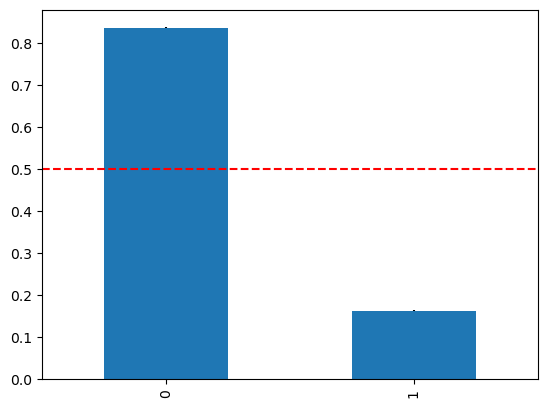

In [19]:
freqs =pd.Series(y).value_counts() /len(y) 
std_errors = np.sqrt(freqs*(1-freqs)/len(y)) 
expected_frequency = 1/len(np.unique(y)) 
freqs.plot(kind='bar',yerr=std_errors*1.96) 
plt.axhline(expected_frequency,color='red',linestyle='--')


Since the frequency for both the classes(length of the bar) is far from what we expected (the red line), we are only 5% confident that the dataset is balanced which is quite less. Hence we can say that the dataset is imbalanced and we can further in our evaluation.

# BASELINE EXECUTION

### 1. KNN

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, average_precision_score, precision_recall_curve

def fit_model(data, target, k):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is spit into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    X_train = np.ascontiguousarray(X_train)
    X_val = np.ascontiguousarray(X_val)
    X_test = np.ascontiguousarray(X_test)

    # Instantiate the KNN classifier with the desired number of neighbors. 
    # We are taking k=5
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Fit the model to the training data
    knn_model.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = knn_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')

    # Make predictions on the validation set
    y_val_pred = knn_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    accuracy_val = accuracy_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred, average='weighted')
    recall_val = recall_score(y_val, y_val_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')

    # Make predictions on the test set
    y_test_pred = knn_model.predict(X_test)

    # Evaluate the model's performance on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    # Calculate AUC-ROC
    y_test_proba = knn_model.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)

    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    auc_pr = auc(recall, precision)

    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {roc_auc}")
    print(f"AUC-PR: {auc_pr}")
# Example usage
fit_model(df_data, 'Response', 5)


Train Accuracy: 0.8864722711651518
Validation Accuracy: 0.8277531368162133
Test Accuracy: 0.8272821237456006


Train Precision: 0.880185316108164
Validation Precision: 0.817423268299299
Test Precision: 0.8163398927462991


Train Recall: 0.8864722711651518
Validation Recall: 0.8277531368162133
Test Recall: 0.8272821237456006


Train F1 Score: 0.8823350038048987
Validation F1 Score: 0.8219630490401619
Test F1 Score: 0.8210632236659636


AUC-ROC: 0.8305425128531148
AUC-PR: 0.453563193240874


### 2. Logistic Regression

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc, accuracy_score

def fit_model_LR(data, target):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is split into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    # Instantiate the Logistic Regression model
    log_reg_model = LogisticRegression(max_iter=1000)

    # Fit the model to the training data
    log_reg_model.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = log_reg_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')

    # Make predictions on the validation set
    y_val_pred = log_reg_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    accuracy_val = accuracy_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred, average='weighted')
    recall_val = recall_score(y_val, y_val_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')

    # Make predictions on the test set
    y_test_pred = log_reg_model.predict(X_test)

    # Evaluate the model's performance on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    # Calculate AUC-ROC
    y_test_proba = log_reg_model.predict_proba(X_test)[:, 1]  # Probability of positive class
    auc_roc = roc_auc_score(y_test, y_test_proba)

    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    auc_pr = auc(recall, precision)
    
    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {auc_roc}")
    print(f"AUC-PR: {auc_pr}")

fit_model_LR(df_data, 'Response')

Train Accuracy: 0.8361041815676081
Validation Accuracy: 0.8370818123536261
Test Accuracy: 0.8337062186809018


Train Precision: 0.7703791241287941
Validation Precision: 0.7793580618177435
Test Precision: 0.7728663958455506


Train Recall: 0.8361041815676081
Validation Recall: 0.8370818123536261
Test Recall: 0.8337062186809018


Train F1 Score: 0.7644707941844283
Validation F1 Score: 0.7661446749638183
Test F1 Score: 0.7613688072120549


AUC-ROC: 0.8546118708472009
AUC-PR: 0.43050887525503684


### Decision Trees

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

def fit_model_DT(data, target):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is spit into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    # Instantiate the Decision Tree classifier
    dt_model = DecisionTreeClassifier(random_state=42)

    # Fit the model to the training data
    dt_model.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = dt_model.predict(X_train)
    precision_train = precision_score(y_train, y_train_pred,average='weighted')
    recall_train = recall_score(y_train, y_train_pred,average='weighted')
    f1_train = f1_score(y_train, y_train_pred,average='weighted')
    accuracy_train = accuracy_score(y_train, y_train_pred)

    # Make predictions on the validation set
    y_val_pred = dt_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    precision_val = precision_score(y_val, y_val_pred, average='weighted')
    recall_val = recall_score(y_val, y_val_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')
    accuracy_val = accuracy_score(y_val, y_val_pred)

    # Make predictions on the test set
    y_test_pred = dt_model.predict(X_test)

    # Evaluate the model's performance on the test set
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred,  average='weighted')
    f1_test = f1_score(y_test, y_test_pred,  average='weighted')
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Calculate AUC-ROC
    y_test_proba = dt_model.predict_proba(X_test)[:, 1]  # Probability of positive class
    auc_roc = roc_auc_score(y_test, y_test_proba)

    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    auc_pr = auc(recall, precision)

    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {auc_roc}")
    print(f"AUC-PR: {auc_pr}")

# Example usage
fit_model_DT(df_data, 'Response')


Train Accuracy: 0.9998299112049265
Validation Accuracy: 0.8140152555900093
Test Accuracy: 0.812916225091913


Train Precision: 0.9998299457797839
Validation Precision: 0.8168415987563292
Test Precision: 0.8149315179970852


Train Recall: 0.9998299112049265
Validation Recall: 0.8140152555900093
Test Recall: 0.812916225091913


Train F1 Score: 0.999829875571528
Validation F1 Score: 0.8153938839909793
Test F1 Score: 0.8139055859149591


AUC-ROC: 0.6677408769515063
AUC-PR: 0.4897971330617993


### Random Forest

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve, accuracy_score

def fit_model_RF(data, target):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is split into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    # Instantiate the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)

    # Fit the model to the training data
    rf_model.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = rf_model.predict(X_train)
    precision_train = precision_score(y_train, y_train_pred,average='weighted')
    recall_train = recall_score(y_train, y_train_pred,average='weighted')
    f1_train = f1_score(y_train, y_train_pred,average='weighted')
    accuracy_train = accuracy_score(y_train, y_train_pred)

    # Make predictions on the validation set
    y_val_pred = rf_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    precision_val = precision_score(y_val, y_val_pred,average='weighted')
    recall_val = recall_score(y_val, y_val_pred,average='weighted')
    f1_val = f1_score(y_val, y_val_pred,average='weighted')
    accuracy_val = accuracy_score(y_val, y_val_pred)

    # Make predictions on the test set
    y_test_pred = rf_model.predict(X_test)

    # Evaluate the model's performance on the test set
    precision_test = precision_score(y_test, y_test_pred,average='weighted')
    recall_test = recall_score(y_test, y_test_pred,average='weighted')
    f1_test = f1_score(y_test, y_test_pred,average='weighted')
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Calculate AUC-ROC
    y_test_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of positive class
    auc_roc = roc_auc_score(y_test, y_test_proba)

    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    auc_pr = auc(recall, precision)
    
    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {auc_roc}")
    print(f"AUC-PR: {auc_pr}")

# Example usage
fit_model_RF(df_data, 'Response')


Train Accuracy: 0.9998168274514593
Validation Accuracy: 0.8379584200128221
Test Accuracy: 0.8364930460153602


Train Precision: 0.9998168138617546
Validation Precision: 0.8240569591662178
Test Precision: 0.8220959131576452


Train Recall: 0.9998168274514593
Validation Recall: 0.8379584200128221
Test Recall: 0.8364930460153602


Train F1 Score: 0.9998168156494308
Validation F1 Score: 0.8295269283625682
Test F1 Score: 0.8276274580148815


AUC-ROC: 0.8807220635543407
AUC-PR: 0.4893975508713128


### MultiLayer Perceptron

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc, accuracy_score

def fit_model_MLP(data, target):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is split into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    # Instantiate the MLP model
    mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd', learning_rate='constant', learning_rate_init=0.01, max_iter=1000)

    # Fit the model to the training data
    mlp_model.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = mlp_model.predict(X_train)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    accuracy_train = accuracy_score(y_train, y_train_pred)

    # Make predictions on the validation set
    y_val_pred = mlp_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    precision_val = precision_score(y_val, y_val_pred, average='weighted')
    recall_val = recall_score(y_val, y_val_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')
    accuracy_val = accuracy_score(y_val, y_val_pred)

    # Make predictions on the test set
    y_test_pred = mlp_model.predict(X_test)

    # Evaluate the model's performance on the test set
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Calculate AUC-ROC
    y_test_proba = mlp_model.predict_proba(X_test)[:, 1]  # Probability of positive class
    auc_roc = roc_auc_score(y_test, y_test_proba)
    
    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    auc_pr = auc(recall, precision)
    
    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {auc_roc}")
    print(f"AUC-PR: {auc_pr}")

# Example usage
fit_model_MLP(df_data, 'Response')


Train Accuracy: 0.8366144479528287
Validation Accuracy: 0.836676217765043
Test Accuracy: 0.8346482448221272


Train Precision: 0.8410416585839058
Validation Precision: 0.8414643357989884
Test Precision: 0.8387598511029636


Train Recall: 0.8366144479528287
Validation Recall: 0.836676217765043
Test Recall: 0.8346482448221272


Train F1 Score: 0.8387084420262516
Validation F1 Score: 0.8389321186011789
Test F1 Score: 0.8365997601915172


AUC-ROC: 0.8842576853085978
AUC-PR: 0.49307620377303707


The performance scores of all the models are quite high with Decision Trees and Random forest even going towards overfitting with the training datasets. This shows that the model has clearly favored the majority class and the results are biased.

### MAKING THE DATASET BALANCED

# CI ALGORITHM 1: RANDOM UNDERSAMPLING

In [21]:
import pandas as pd
from sklearn.utils import resample

# Random undersampling
def random_undersample(data, label):
    # Separate majority and minority classes
    majority_class = data[data[label] == 0]
    minority_class = data[data[label] == 1]
    
    # Downsample majority class
    majority_downsampled = resample(majority_class, 
                                     replace=False,    # sample without replacement
                                     n_samples=len(minority_class),  # to match minority class
                                     random_state=42) # reproducible results
    
    # Combine minority class with downsampled majority class
    downsampled_data = pd.concat([majority_downsampled, minority_class])
    
    return downsampled_data

# Apply random undersampling
balanced_data1 = random_undersample(df_data, 'Response')

# Check the class distribution
print(balanced_data1['Response'].value_counts())


0    62601
1    62601
Name: Response, dtype: int64


In [22]:
import numpy as np 
from scipy.stats import norm,chisquare 
import matplotlib.pyplot as plt
X = balanced_data1.drop(columns=['Response'])
y = balanced_data1['Response']

### Checking if the dataset has become balanced

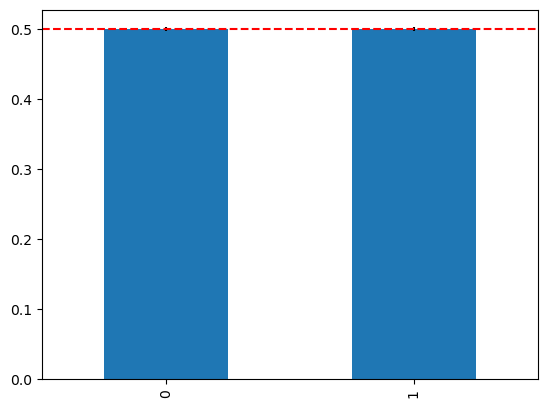

In [23]:
freqs =pd.Series(y).value_counts() /len(y) 
std_errors = np.sqrt(freqs*(1-freqs)/len(y)) 
expected_frequency = 1/len(np.unique(y)) 
freqs.plot(kind='bar',yerr=std_errors*1.96) 
plt.axhline(expected_frequency,color='red',linestyle='--')

The distribution shows that the dataset has become balanced.

In [28]:
balanced_data1

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
248753,1,-0.96,1,43,1,1,0,-0.20,0.74,0.07,0
4188,1,-1.09,1,46,1,1,0,0.45,0.74,-0.35,0
301728,1,1.15,1,13,1,0,0,0.11,-1.58,-0.12,0
74678,0,0.95,1,47,0,0,1,-0.27,-1.58,0.77,0
380472,0,1.61,1,28,1,0,0,0.45,-1.58,1.40,0
...,...,...,...,...,...,...,...,...,...,...,...
382106,0,0.49,1,8,0,0,1,2.19,-1.58,-0.65,1
382116,0,0.03,1,28,0,0,1,-0.20,-1.42,-0.15,1
382137,1,0.03,1,46,0,0,1,-0.40,0.22,-0.68,1
382143,1,1.01,1,28,0,0,1,0.38,-1.58,1.45,1


# EDA

Plotting Boxplots and histograms of the features relevant to our data.

In [29]:
# Making neceesary imports.
from matplotlib import pyplot as plt
import seaborn as sns

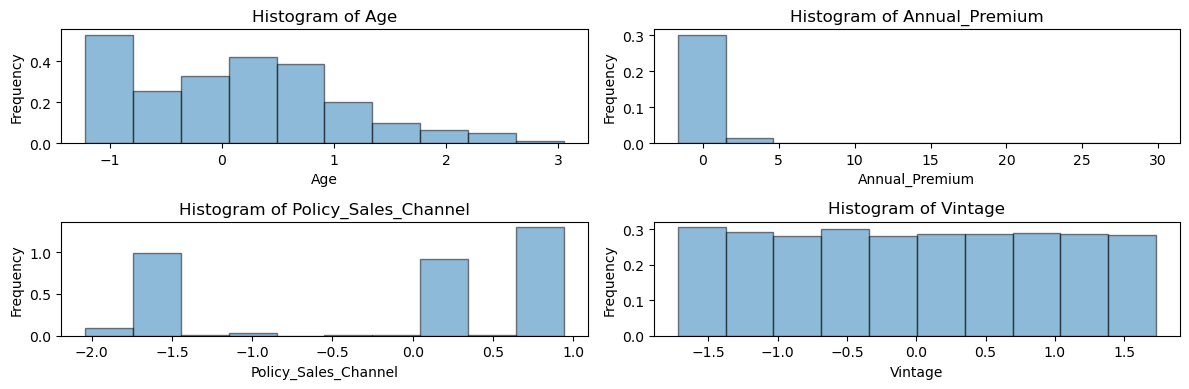

In [30]:
def plot_histogram(data):
    # This function plots histograms of all the numerical variables.
    num_cols = len(numerical_columns)
    rows = num_cols // 2 + num_cols % 2  # Adjusting rows based on columns to display as subplots. 

    fig, axes = plt.subplots(rows, 2, figsize=(12, 2 * rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        axes[i].hist(data[col], density=True, alpha=0.5, edgecolor='black')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(f'Histogram of {col}')

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_histogram(balanced_data1)


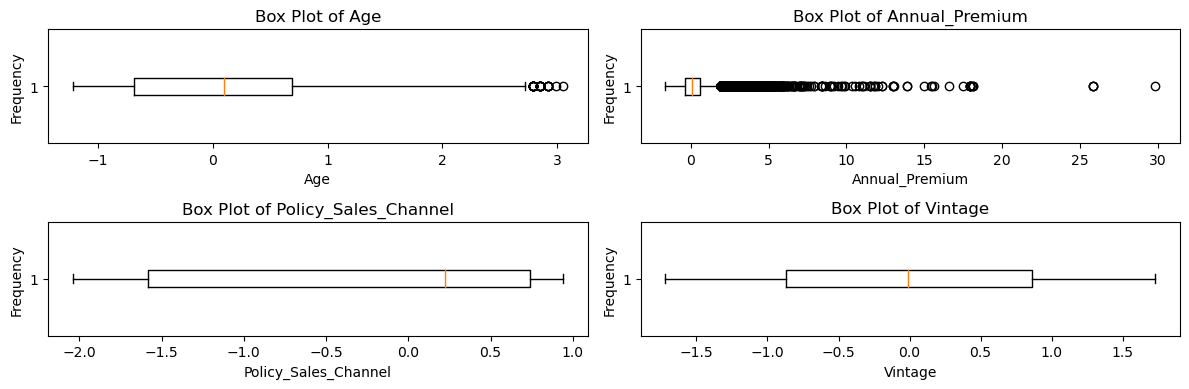

In [31]:
def plot_boxplot(data):
    # This function plots the BoxPlots of all the numerical variables.
    num_cols = len(numerical_columns)
    rows = num_cols // 2 + num_cols % 2  # Adjust rows based on the number of numerical columns

    fig, axes = plt.subplots(rows, 2, figsize=(12, 2 * rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        axes[i].boxplot(data[col],vert=False)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(f'Box Plot of {col}')

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_boxplot(balanced_data1)


### EDA INTERPRETATION: 
The data does not have a lot outlliers and is generally clean. Only the annual premium has outliers. Vintage has perfectly normal distribution while Age is right skewed. The spread of data in Poilcy_Sales_Channel is quite high with a larger box than whiskers.

C:\Users\hinaa\AppData\Local\Temp\ipykernel_9844\68557999.py:42: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\hinaa\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


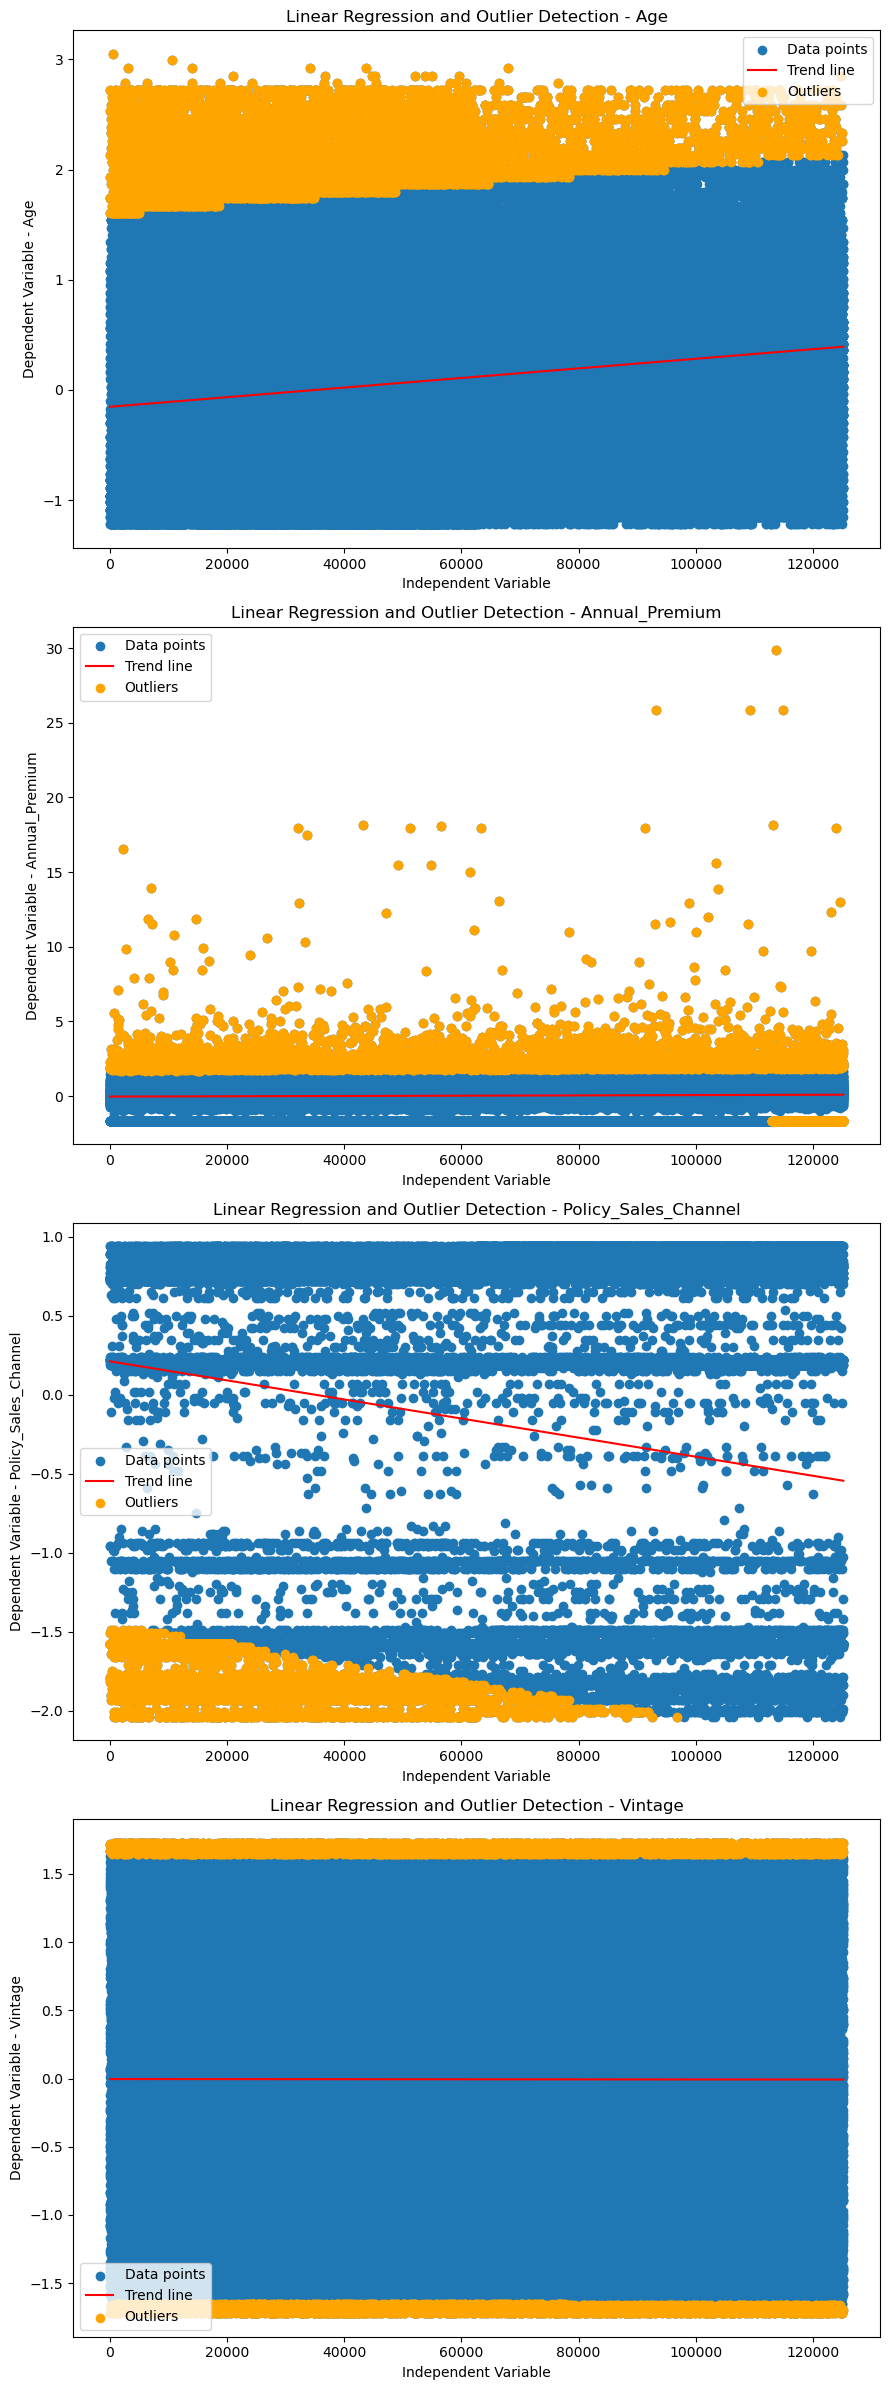

In [32]:
def df_num_col(data):
    # The purpose of this fucntion is to create a dataframe of numerical columns of our data.
    df=data
    return df
df=df_num_col(balanced_data1[numerical_columns])
def detect_outl(df):
    # This function creates scatter plots of all numerical variables that identifies each point as 
    # either a data point or an outlier
    import numpy as np
    num_plots = len(numerical_columns)
    fig, axes = plt.subplots(num_plots, 1, figsize=(9, 6 * num_plots))


    for i, col in enumerate(numerical_columns):
        X = np.arange(len(df)).reshape(-1, 1)  # Independent variable
        y = df[col].values.reshape(-1, 1)  # Dependent variable

        # Linear regression is performed using numpy.
        coefficients = np.polyfit(X.flatten(), y.flatten(), 1)
        trend_line = np.polyval(coefficients, X.flatten())

        # Residuals are calculated.
        residuals = y - trend_line.reshape(-1, 1)

        # A threshold is set based on the 95th percentile 
        # Quantiles are used to set the threshold. 
        # Outliers are set as those data points that are beyond the 95th percentile of the residuals.
        threshold = np.percentile(np.abs(residuals), 95)

        # Outliers are identified based on residuals.
        outlier_mask = np.abs(residuals) > threshold
        outliers = df[outlier_mask.flatten()]

        # PData points and the trend line is plotted.
        axes[i].scatter(X, y, label='Data points')
        axes[i].plot(X, trend_line, color='red', label='Trend line')
        axes[i].scatter(X[outlier_mask], y[outlier_mask], color='orange', label='Outliers')
        axes[i].set_xlabel('Independent Variable')
        axes[i].set_ylabel(f'Dependent Variable - {col}')
        axes[i].set_title(f'Linear Regression and Outlier Detection - {col}')
        axes[i].legend()
    plt.tight_layout()
    plt.show()
    
detect_outl(balanced_data1)
    

## Model Selection
# **ALGORITHM 1: KNN**

### Manual Splitting:

In [33]:
fit_model(balanced_data1, 'Response', 5)

Train Accuracy: 0.858228724324756
Validation Accuracy: 0.8052316293929712
Test Accuracy: 0.8039615031348588


Train Precision: 0.8650416071177085
Validation Precision: 0.811757891718311
Test Precision: 0.8101542612770364


Train Recall: 0.858228724324756
Validation Recall: 0.8052316293929712
Test Recall: 0.8039615031348588


Train F1 Score: 0.8575593799047524
Validation F1 Score: 0.8041788469748012
Test F1 Score: 0.8030278765316675


AUC-ROC: 0.8550542342190277
AUC-PR: 0.8222438074848852


### Cross-Validation:

In [34]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def fit_model_cv(data, target, k, KF):

    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    features = data.drop(columns=[target])
    X = features.values
    y = data[target_column_name].values

    # Number of neighbors for KNN
    k_neighbors = k
    # Number of folds for cross-validation
    num_folds = KF

    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k_neighbors)

    # Create KFold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Initialize variables to store overall metrics
    overall_accuracy = 0
    overall_precision_pos = 0
    overall_precision_neg = 0
    overall_recall_pos = 0
    overall_recall_neg = 0
    overall_f1_pos = 0
    overall_f1_neg = 0
    overall_auc = 0

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train KNN model
        knn.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = knn.predict(X_test)

        # Calculate metrics for this fold
        fold_accuracy = accuracy_score(y_test, predictions)
        fold_precision_pos = precision_score(y_test, predictions, pos_label=1)
        fold_precision_neg = precision_score(y_test, predictions, pos_label=0)
        fold_recall_pos = recall_score(y_test, predictions, pos_label=1)
        fold_recall_neg = recall_score(y_test, predictions, pos_label=0)
        fold_f1_pos = f1_score(y_test, predictions, pos_label=1)
        fold_f1_neg = f1_score(y_test, predictions, pos_label=0)
        fold_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

        print(f"Fold {fold}:")
        print(f"  Accuracy: {fold_accuracy}")
        print(f"  Precision (Positive): {fold_precision_pos}")
        print(f"  Precision (Negative): {fold_precision_neg}")
        print(f"  Recall (Positive): {fold_recall_pos}")
        print(f"  Recall (Negative): {fold_recall_neg}")
        print(f"  F1 Score (Positive): {fold_f1_pos}")
        print(f"  F1 Score (Negative): {fold_f1_neg}")
        print(f"  AUC: {fold_auc}")

        # Add fold metrics to overall metrics
        overall_accuracy += fold_accuracy
        overall_precision_pos += fold_precision_pos
        overall_precision_neg += fold_precision_neg
        overall_recall_pos += fold_recall_pos
        overall_recall_neg += fold_recall_neg
        overall_f1_pos += fold_f1_pos
        overall_f1_neg += fold_f1_neg
        overall_auc += fold_auc

    # Calculate and print average metrics across all folds
    average_accuracy = overall_accuracy / num_folds
    average_precision_pos = overall_precision_pos / num_folds
    average_precision_neg = overall_precision_neg / num_folds
    average_recall_pos = overall_recall_pos / num_folds
    average_recall_neg = overall_recall_neg / num_folds
    average_f1_pos = overall_f1_pos / num_folds
    average_f1_neg = overall_f1_neg / num_folds
    average_auc = overall_auc / num_folds

    print("\nAverage Metrics:")
    print(f"  Average Accuracy: {average_accuracy}")
    print(f"  Average Precision (Positive): {average_precision_pos}")
    print(f"  Average Precision (Negative): {average_precision_neg}")
    print(f"  Average Recall (Positive): {average_recall_pos}")
    print(f"  Average Recall (Negative): {average_recall_neg}")
    print(f"  Average F1 Score (Positive): {average_f1_pos}")
    print(f"  Average F1 Score (Negative): {average_f1_neg}")
    print(f"  Average AUC: {average_auc}")

# Example usage
fit_model_cv(balanced_data1, 'Response', 5, 10)

Fold 1:
  Accuracy: 0.8051273859915342
  Precision (Positive): 0.7631877481565513
  Precision (Negative): 0.8592064362771987
  Recall (Positive): 0.8748374512353706
  Recall (Negative): 0.7377924320929502
  F1 Score (Positive): 0.8152075128748864
  F1 Score (Negative): 0.7938841020442642
  AUC: 0.8568372364433462
Fold 2:
  Accuracy: 0.8036099353086814
  Precision (Positive): 0.7672823957458719
  Precision (Negative): 0.851906976744186
  Recall (Positive): 0.873228221054308
  Recall (Negative): 0.7335789810958027
  F1 Score (Positive): 0.8168342644320298
  F1 Score (Negative): 0.7883274511491779
  AUC: 0.8601345125487332
Fold 3:
  Accuracy: 0.8070287539936102
  Precision (Positive): 0.768557130942452
  Precision (Negative): 0.8589936162223056
  Recall (Positive): 0.8804140127388536
  Recall (Negative): 0.7331730769230769
  F1 Score (Positive): 0.8206917025382218
  F1 Score (Negative): 0.791111879647242
  AUC: 0.8607945961946758
Fold 4:
  Accuracy: 0.8067891373801916
  Precision (Positiv

### Feature Selection

### Correlation

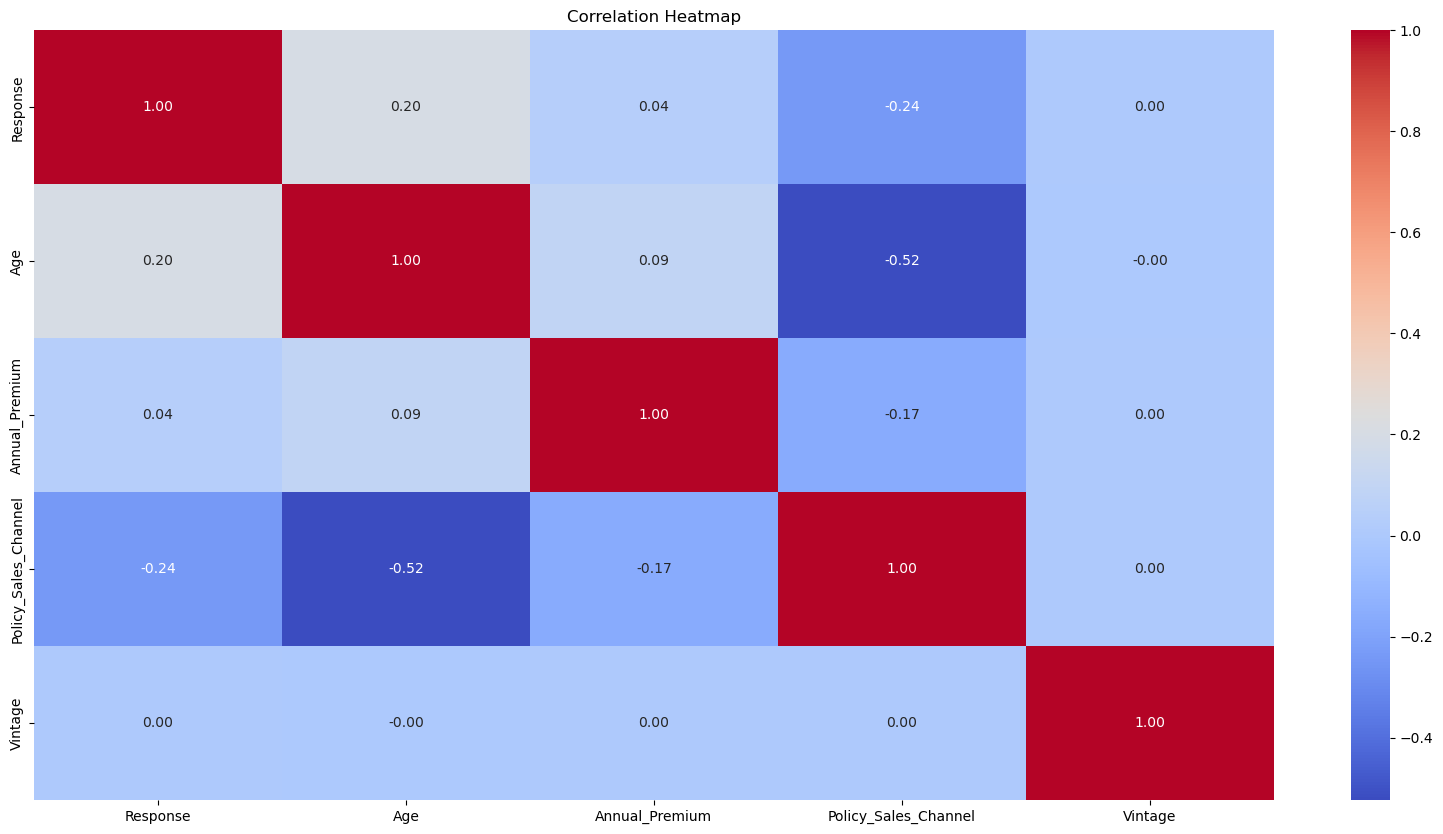

In [35]:
 def feature_eng(data,target,df):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Assuming 'target_column' is your target variable and 'feature_columns' are your feature columns
    target_column = target
    feature_columns = df

    # Extract the subset of data containing only the features and the target variable
    data_subset = data[[target_column] + feature_columns]

    # Calculate the correlation matrix
    correlation_matrix = data_subset.corr()

    # Plot the heatmap
    plt.figure(figsize=(20, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

feature_eng(balanced_data1,'Response',numerical_columns.to_list())

None of the features are correlated with the class variable. 

### Variance Thresholding

In [30]:
def select_features_variance_threshold(dataset, threshold=0.0):
    
    import pandas as pd
    from sklearn.feature_selection import VarianceThreshold
    # Remove target variable from the data set.
    X = dataset.drop(columns=['Response']) 
    
    # Initialize VarianceThreshold object
    selector = VarianceThreshold(threshold=threshold)
    
    # Fit the selector to the data and transform the feature matrix
    X_selected = selector.fit_transform(X)
    
    # Get the indices of the selected features
    selected_indices = selector.get_support(indices=True)
    
    # Get the names of the selected features
    selected_features = X.columns[selected_indices].tolist()
    
    return selected_indices, selected_features

selected_indices, selected_features=select_features_variance_threshold(balanced_data1, threshold=0.7)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [1 3 7 8 9]
Selected features: ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [38]:
selected_features.append('Response')
var_thrsh_data=balanced_data1[selected_features]
fit_model(var_thrsh_data,'Response',5)

Train Accuracy: 0.7820050318818972
Validation Accuracy: 0.6940495207667732
Test Accuracy: 0.691545864781758


Train Precision: 0.7831247452125621
Validation Precision: 0.6947863047462053
Test Precision: 0.6923975919105917


Train Recall: 0.7820050318818972
Validation Recall: 0.6940495207667732
Test Recall: 0.691545864781758


Train F1 Score: 0.7817853577915362
Validation F1 Score: 0.6937339321076503
Test F1 Score: 0.6912534050006038


AUC-ROC: 0.7350640044607826
AUC-PR: 0.705449679332947


### Wrapper Method 

#### Recursive Feature Elimination

In [44]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

def select_features_rfe(data, target, n_features_to_select):
    X = data.drop(columns=[target]).values
    y = data[target].values
    # Initialize the logistic regression model
    estimator = LogisticRegression(max_iter=1000)

    # Initialize the RFE selector
    selector = RFE(estimator, n_features_to_select=n_features_to_select)

    # Fit the RFE selector to the data
    selector = selector.fit(X, y)

    # Get the indices of the selected features
    selected_indices = selector.support_

    # Get the names of the selected features
    feature_names = data.drop(columns=[target]).columns.tolist()
    wrp_selected_features = [feature_names[i] for i, selected in enumerate(selected_indices) if selected]
    
    return wrp_selected_features


# Perform feature selection using RFE
rfe_selected_features = select_features_rfe(balanced_data1, 'Response', 3)

# Print the selected features
print("Selected features:", rfe_selected_features)

Selected features: ['Driving_License', 'Previously_Insured', 'Vehicle_Damage']


In [40]:
rfe_selected_features.append('Response')
wrapper_data_rfe=balanced_data1[rfe_selected_features]
fit_model(wrapper_data_rfe,'Response',5)

Train Accuracy: 0.8147521997843479
Validation Accuracy: 0.8148562300319488
Test Accuracy: 0.8140249990016373


Train Precision: 0.8565764312892133
Validation Precision: 0.8555413602484988
Test Precision: 0.8550949474832895


Train Recall: 0.8147521997843479
Validation Recall: 0.8148562300319488
Test Recall: 0.8140249990016373


Train F1 Score: 0.8091397058508989
Validation F1 Score: 0.8093444482063891
Test F1 Score: 0.8085958061661923


AUC-ROC: 0.814489008254757
AUC-PR: 0.8628704418094653


#### Forward Feature Selection

In [45]:
def select_features_wrapper_ols(data, target, n_features_to_select):
    from sklearn.feature_selection import SequentialFeatureSelector
    from sklearn.linear_model import LogisticRegression
    
    X = data.drop(columns=[target]).values
    y = data[target].values
    
    # Initialize the Logistic regression model
    estimator = LogisticRegression()

    # Initialize the RFE selector without cross-validation
    selector = SequentialFeatureSelector(estimator, n_features_to_select=n_features_to_select,direction='forward')

    # Fit the RFE selector to the data
    selector = selector.fit(X, y)

    # Get the indices of the selected features
    selected_indices = selector.support_

    # Get the names of the selected features
    feature_names = data.drop(columns=[target]).columns.tolist()
    ffs_selected_features = [feature_names[i] for i, selected in enumerate(selected_indices) if selected]
    
    return ffs_selected_features

# Perform feature selection using wrapper method (RFE without cross-validation and OLS estimator)
ffs_selected_features = select_features_wrapper_ols(balanced_data1, 'Response', 4)
# Print the selected features
print("Selected features using OLS:", ffs_selected_features)

Selected features using OLS: ['Gender', 'Age', 'Driving_License', 'Region_Code']


In [42]:
ffs_selected_features.append('Response')
wrapper_data_ffs=balanced_data1[ffs_selected_features]
fit_model(wrapper_data_ffs,'Response',5)

Train Accuracy: 0.6879700749457541
Validation Accuracy: 0.6878194888178913
Test Accuracy: 0.683718701329819


Train Precision: 0.6925102145035734
Validation Precision: 0.6922944607996577
Test Precision: 0.688245843313131


Train Recall: 0.6879700749457541
Validation Recall: 0.6878194888178913
Test Recall: 0.683718701329819


Train F1 Score: 0.6861373404786822
Validation F1 Score: 0.6860577017115386
Test F1 Score: 0.6816791121178455


AUC-ROC: 0.8097685481016318
AUC-PR: 0.8080392790133522


### Principal Component Analysis

In [46]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

def perform_pca(data,target):
    # Drop the target variable 'Status' if it's included in the DataFrame
    X = data.drop(target, axis=1)

    # Instantiate PCA
    pca = PCA()

    # Fit the PCA model with the standardized data
    pca.fit(X)

    # Transform the data onto the new feature space
    X_pca = pca.transform(X)
    
    # Convert X_pca to DataFrame
    X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])


    # You can access the explained variance ratio of each principal component
    explained_variance_ratio = pca.explained_variance_ratio_

    # Plot cumulative explained variance
    cumulative_variance = np.cumsum(explained_variance_ratio)
    plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance by Number of Components')
    plt.grid(True)
    plt.show()

    return X_pca_df

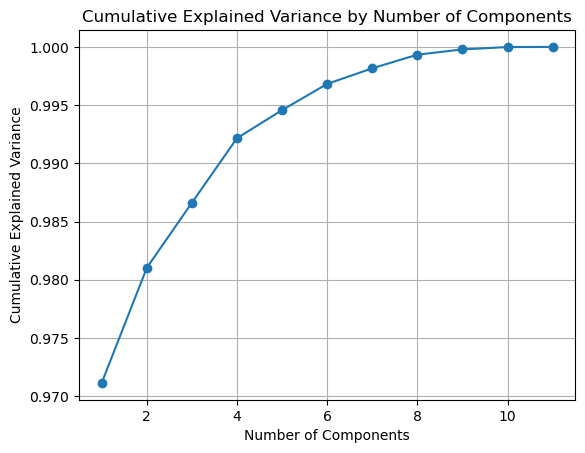

In [47]:
X_pca_df=perform_pca(balanced_data1,'Response')

In [45]:
X_pca_df = X_pca_df.merge(balanced_data1[['Response']], left_index=True, right_index=True)
fit_model(X_pca_df,'Response',5)

Train Accuracy: 0.6942981919105342
Validation Accuracy: 0.4981021182808865
Test Accuracy: 0.49871433819027794


Train Precision: 0.6943054841668289
Validation Precision: 0.4981030571779966
Test Precision: 0.49871342521142076


Train Recall: 0.6942981919105342
Validation Recall: 0.4981021182808865
Test Recall: 0.49871433819027794


Train F1 Score: 0.6942883465787939
Validation F1 Score: 0.4981019828359472
Test F1 Score: 0.49871280501354215


AUC-ROC: 0.4964607424087102
AUC-PR: 0.5015631351735725


#### **COMMENT :** 
The model performed quite good even without any feature selection. However the accuracy, precision and recall dropped from 86 to 80 from training to testing. Hence we can expect the model to perform worse on live data so feature selection was important. 

The model handled imabalance really well since the AUC-PR score improved greatly. AUC-PR is an excellent measure of imbalance in datasets and high AUC-PR value indicated good handling of imbalance. 

After applying Feature selection, only Recursive feature elimination gave a good performance, reducing overfitting as well as increasing overall performance as well.

VT, FFS and PCA failed terribly as they not only decreased the perfromance but also favored the majority class and gave low AUC-PR scores.

# ALGORITHM 2: Logistic Regression

### Manual Splitting:

In [46]:
fit_model_LR(balanced_data1, 'Response')

Train Accuracy: 0.8148187590687025
Validation Accuracy: 0.8149760383386582
Test Accuracy: 0.8141847370312687


Train Precision: 0.8563944056981577
Validation Precision: 0.8554381738578686
Test Precision: 0.8551013830787659


Train Recall: 0.8148187590687025
Validation Recall: 0.8149760383386582
Test Recall: 0.8141847370312687


Train F1 Score: 0.8092396468974806
Validation F1 Score: 0.8094970988895639
Test F1 Score: 0.8087813564300093


AUC-ROC: 0.8508964305254859
AUC-PR: 0.781514925241376


### Cross-Validation:

In [29]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

def fit_model_LR_CV(data, target, KF):

    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target]).values
    y = data[target_column_name].values

    # Number of folds for cross-validation
    num_folds = KF

    # Create Logistic Regression classifier
    log_reg = LogisticRegression(max_iter=1000)

    # Create KFold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Initialize variables to store overall metrics
    overall_accuracy = 0
    overall_precision_pos = 0
    overall_precision_neg = 0
    overall_recall_pos = 0
    overall_recall_neg = 0
    overall_f1_pos = 0
    overall_f1_neg = 0
    overall_auc = 0

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train Logistic Regression model
        log_reg.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = log_reg.predict(X_test)

        # Calculate metrics for this fold
        fold_accuracy = accuracy_score(y_test, predictions)
        fold_precision_pos = precision_score(y_test, predictions, pos_label=1)
        fold_precision_neg = precision_score(y_test, predictions, pos_label=0)
        fold_recall_pos = recall_score(y_test, predictions, pos_label=1)
        fold_recall_neg = recall_score(y_test, predictions, pos_label=0)
        fold_f1_pos = f1_score(y_test, predictions, pos_label=1)
        fold_f1_neg = f1_score(y_test, predictions, pos_label=0)
        fold_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

        print(f"Fold {fold}:")
        print(f"  Accuracy: {fold_accuracy}")
        print(f"  Precision (Positive): {fold_precision_pos}")
        print(f"  Precision (Negative): {fold_precision_neg}")
        print(f"  Recall (Positive): {fold_recall_pos}")
        print(f"  Recall (Negative): {fold_recall_neg}")
        print(f"  F1 Score (Positive): {fold_f1_pos}")
        print(f"  F1 Score (Negative): {fold_f1_neg}")
        print(f"  AUC: {fold_auc}")

        # Add fold metrics to overall metrics
        overall_accuracy += fold_accuracy
        overall_precision_pos += fold_precision_pos
        overall_precision_neg += fold_precision_neg
        overall_recall_pos += fold_recall_pos
        overall_recall_neg += fold_recall_neg
        overall_f1_pos += fold_f1_pos
        overall_f1_neg += fold_f1_neg
        overall_auc += fold_auc

    # Calculate and print average metrics across all folds
    average_accuracy = overall_accuracy / num_folds
    average_precision_pos = overall_precision_pos / num_folds
    average_precision_neg = overall_precision_neg / num_folds
    average_recall_pos = overall_recall_pos / num_folds
    average_recall_neg = overall_recall_neg / num_folds
    average_f1_pos = overall_f1_pos / num_folds
    average_f1_neg = overall_f1_neg / num_folds
    average_auc = overall_auc / num_folds

    print("\nAverage Metrics:")
    print(f"  Average Accuracy: {average_accuracy}")
    print(f"  Average Precision (Positive): {average_precision_pos}")
    print(f"  Average Precision (Negative): {average_precision_neg}")
    print(f"  Average Recall (Positive): {average_recall_pos}")
    print(f"  Average Recall (Negative): {average_recall_neg}")
    print(f"  Average F1 Score (Positive): {average_f1_pos}")
    print(f"  Average F1 Score (Negative): {average_f1_neg}")
    print(f"  Average AUC: {average_auc}")

# Example usage
fit_model_LR_CV(balanced_data1, 'Response', 10)


Fold 1:
  Accuracy: 0.8337345614402345
  Precision (Positive): 0.48342059336823734
  Precision (Negative): 0.8390670244135696
  Recall (Positive): 0.04372533543804262
  Recall (Negative): 0.9907154731658354
  F1 Score (Positive): 0.08019687319050377
  F1 Score (Negative): 0.9086070997065762
  AUC: 0.8532679377163899
Fold 2:
  Accuracy: 0.8350952480636382
  Precision (Positive): 0.5045871559633027
  Precision (Negative): 0.8398768283294842
  Recall (Positive): 0.04360234659901697
  Recall (Negative): 0.9915384374314457
  F1 Score (Positive): 0.08026853473438413
  F1 Score (Negative): 0.9094279965507329
  AUC: 0.857180941602985
Fold 3:
  Accuracy: 0.837162445049194
  Precision (Positive): 0.5220700152207002
  Precision (Negative): 0.842674192603637
  Recall (Positive): 0.05486244401791427
  Recall (Negative): 0.9901764485045677
  F1 Score (Positive): 0.09929078014184398
  F1 Score (Negative): 0.9104900536513096
  AUC: 0.854544766172885
Fold 4:
  Accuracy: 0.8366129369897425
  Precision (

## Feature Engineering

### Variance Thresholding

In [48]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data1, threshold=0.8)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [1 3 7 8 9]
Selected features: ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [49]:
selected_features.append('Response')
var_thrsh_data=balanced_data1[selected_features]
fit_model_LR(var_thrsh_data,'Response')

Train Accuracy: 0.5809427457035982
Validation Accuracy: 0.578594249201278
Test Accuracy: 0.5772932390878959


Train Precision: 0.5833307779796507
Validation Precision: 0.5808128211338548
Test Precision: 0.579358828076613


Train Recall: 0.5809427457035982
Validation Recall: 0.578594249201278
Test Recall: 0.5772932390878959


Train F1 Score: 0.5779703686996792
Validation F1 Score: 0.5758700820115341
Test F1 Score: 0.5741613943283883


AUC-ROC: 0.6680027803979964
AUC-PR: 0.5774584227228011


### Wrapper Method 

#### Recursive Feature Elimination

In [50]:
fit_model_LR(wrapper_data_rfe,'Response')

Train Accuracy: 0.8147521997843479
Validation Accuracy: 0.8148562300319488
Test Accuracy: 0.8140249990016373


Train Precision: 0.8565764312892133
Validation Precision: 0.8555413602484988
Test Precision: 0.8550949474832895


Train Recall: 0.8147521997843479
Validation Recall: 0.8148562300319488
Test Recall: 0.8140249990016373


Train F1 Score: 0.8091397058508989
Validation F1 Score: 0.8093444482063891
Test F1 Score: 0.8085958061661923


AUC-ROC: 0.8188322143421102
AUC-PR: 0.8644000690573013


#### Forward Feature Selection

In [51]:
fit_model_LR(wrapper_data_ffs,'Response')

Train Accuracy: 0.8147521997843479
Validation Accuracy: 0.8148562300319488
Test Accuracy: 0.8140249990016373


Train Precision: 0.8565764312892133
Validation Precision: 0.8555413602484988
Test Precision: 0.8550949474832895


Train Recall: 0.8147521997843479
Validation Recall: 0.8148562300319488
Test Recall: 0.8140249990016373


Train F1 Score: 0.8091397058508989
Validation F1 Score: 0.8093444482063891
Test F1 Score: 0.8085958061661923


AUC-ROC: 0.822144272712479
AUC-PR: 0.8159905045934914


### Principal Component Analysis

In [52]:
fit_model_LR(X_pca_df,'Response')

Train Accuracy: 0.5080608954736542
Validation Accuracy: 0.4988367821721562
Test Accuracy: 0.5065507530304886


Train Precision: 0.5082744323104065
Validation Precision: 0.498633380992741
Test Precision: 0.5069523498971332


Train Recall: 0.5080608954736542
Validation Recall: 0.4988367821721562
Test Recall: 0.5065507530304886


Train F1 Score: 0.4988424092925669
Validation F1 Score: 0.4902075926861878
Test F1 Score: 0.49782524708823206


AUC-ROC: 0.5032015357632513
AUC-PR: 0.497885265586352


**Comment :**
The model performed really well. The accuracy, precision and recall scores were all very good with no sign of overfitting as train, validation and test datasets gave similar perfromance. The Auc scores were also good enough, showcasing that imbalance was handled well. 

After feature selection, Wrapper's method gave an even good performance with increasing AUC scores from 80% to 86%.

VT and PCA however, failed terribly.

# ALGORITHM 3: DECISION TREES

### Manual Splitting:

In [53]:
fit_model_DT(balanced_data1, 'Response')

Train Accuracy: 0.9998801932881618
Validation Accuracy: 0.7605431309904154
Test Accuracy: 0.7615510562677209


Train Precision: 0.9998802220004269
Validation Precision: 0.7606346117688623
Test Precision: 0.7616117074432425


Train Recall: 0.9998801932881618
Validation Recall: 0.7605431309904154
Test Recall: 0.7615510562677209


Train F1 Score: 0.9998801932923653
Validation F1 Score: 0.7605269035725071
Test F1 Score: 0.7615293280423842


AUC-ROC: 0.7615264675887413
AUC-PR: 0.8206254708684815


### Cross-Validation:

In [54]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve

def fit_model_DT_CV(data, target, KF):

    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target]).values
    y = data[target_column_name].values

    # Number of folds for cross-validation
    num_folds = KF

    # Create Decision Tree classifier
    dt = DecisionTreeClassifier(random_state=42)

    # Create KFold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Initialize variables to store overall metrics
    overall_accuracy = 0
    overall_precision_pos = 0
    overall_precision_neg = 0
    overall_recall_pos = 0
    overall_recall_neg = 0
    overall_f1_pos = 0
    overall_f1_neg = 0
    overall_auc = 0

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train Decision Tree model
        dt.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = dt.predict(X_test)

        # Calculate metrics for this fold
        fold_accuracy = accuracy_score(y_test, predictions)
        fold_precision_pos = precision_score(y_test, predictions, pos_label=1)
        fold_precision_neg = precision_score(y_test, predictions, pos_label=0)
        fold_recall_pos = recall_score(y_test, predictions, pos_label=1)
        fold_recall_neg = recall_score(y_test, predictions, pos_label=0)
        fold_f1_pos = f1_score(y_test, predictions, pos_label=1)
        fold_f1_neg = f1_score(y_test, predictions, pos_label=0)
        fold_auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

        print(f"Fold {fold}:")
        print(f"  Accuracy: {fold_accuracy }")
        print(f"  Precision (Positive): {fold_precision_pos}")
        print(f"  Precision (Negative): {fold_precision_neg}")
        print(f"  Recall (Positive): {fold_recall_pos}")
        print(f"  Recall (Negative): {fold_recall_neg}")
        print(f"  F1 Score (Positive): {fold_f1_pos}")
        print(f"  F1 Score (Negative): {fold_f1_neg}")
        print(f"  AUC: {fold_auc}")

        # Add fold metrics to overall metrics
        overall_accuracy+= fold_accuracy
        overall_precision_pos += fold_precision_pos
        overall_precision_neg += fold_precision_neg
        overall_recall_pos += fold_recall_pos
        overall_recall_neg += fold_recall_neg
        overall_f1_pos += fold_f1_pos
        overall_f1_neg += fold_f1_neg
        overall_auc += fold_auc

    # Calculate and print average metrics across all folds
    average_accuracy = overall_accuracy / num_folds
    average_precision_pos = overall_precision_pos / num_folds
    average_precision_neg = overall_precision_neg / num_folds
    average_recall_pos = overall_recall_pos / num_folds
    average_recall_neg = overall_recall_neg / num_folds
    average_f1_pos = overall_f1_pos / num_folds
    average_f1_neg = overall_f1_neg / num_folds
    average_auc = overall_auc / num_folds

    print("\nAverage Metrics:")
    print(f"  Average Accuracy: {average_accuracy}")
    print(f"  Average Precision (Positive): {average_precision_pos}")
    print(f"  Average Precision (Negative): {average_precision_neg}")
    print(f"  Average Recall (Positive): {average_recall_pos}")
    print(f"  Average Recall (Negative): {average_recall_neg}")
    print(f"  Average F1 Score (Positive): {average_f1_pos}")
    print(f"  Average F1 Score (Negative): {average_f1_neg}")
    print(f"  Average AUC: {average_auc}")

# Example usage
fit_model_DT_CV(balanced_data1, 'Response', 10)

Fold 1:
  Accuracy: 0.7642360833799218
  Precision (Positive): 0.7638522427440633
  Precision (Negative): 0.7645965618708378
  Recall (Positive): 0.752925877763329
  Recall (Negative): 0.7751609357826974
  F1 Score (Positive): 0.7583497053045186
  F1 Score (Negative): 0.7698425074068299
  AUC: 0.7640240101548441
Fold 2:
  Accuracy: 0.7648750099832282
  Precision (Positive): 0.7699530516431925
  Precision (Negative): 0.7599306431273645
  Recall (Positive): 0.757445453097627
  Recall (Negative): 0.7723486062159565
  F1 Score (Positive): 0.7636480411046885
  F1 Score (Negative): 0.7660893055776259
  AUC: 0.7650200346904301
Fold 3:
  Accuracy: 0.7656549520766773
  Precision (Positive): 0.7687982005141388
  Precision (Negative): 0.7625476493011436
  Recall (Positive): 0.7619426751592356
  Recall (Negative): 0.7693910256410257
  F1 Score (Positive): 0.7653550863723608
  F1 Score (Negative): 0.7659540523292916
  AUC: 0.7656477752939734
Fold 4:
  Accuracy: 0.7524760383386582
  Precision (Posit

## Feature Selection

### Variance Thresholding

In [55]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data1, threshold=0.8)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [1 3 7 8 9]
Selected features: ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [56]:
selected_features.append('Response')
var_thrsh_data=balanced_data1[selected_features]
fit_model_DT(var_thrsh_data,'Response')

Train Accuracy: 0.9993210952995834
Validation Accuracy: 0.6523562300319489
Test Accuracy: 0.6495347629886985


Train Precision: 0.9993219454513036
Validation Precision: 0.6523713712293014
Test Precision: 0.6495366871383814


Train Recall: 0.9993210952995834
Validation Recall: 0.6523562300319489
Test Recall: 0.6495347629886985


Train F1 Score: 0.9993210951934738
Validation F1 Score: 0.6523523294176098
Test F1 Score: 0.649535310722255


AUC-ROC: 0.6497589048041253
AUC-PR: 0.7363267875771365


### Wrapper Method 

#### Recursive Feature Elimination

In [57]:
fit_model_DT(wrapper_data_rfe,'Response')

Train Accuracy: 0.8147521997843479
Validation Accuracy: 0.8148562300319488
Test Accuracy: 0.8140249990016373


Train Precision: 0.8565764312892133
Validation Precision: 0.8555413602484988
Test Precision: 0.8550949474832895


Train Recall: 0.8147521997843479
Validation Recall: 0.8148562300319488
Test Recall: 0.8140249990016373


Train F1 Score: 0.8091397058508989
Validation F1 Score: 0.8093444482063891
Test F1 Score: 0.8085958061661923


AUC-ROC: 0.8188327884618267
AUC-PR: 0.8644002802507554


#### Forward Feature Selection

In [58]:
fit_model_LR(wrapper_data_ffs,'Response')

Train Accuracy: 0.8147521997843479
Validation Accuracy: 0.8148562300319488
Test Accuracy: 0.8140249990016373


Train Precision: 0.8565764312892133
Validation Precision: 0.8555413602484988
Test Precision: 0.8550949474832895


Train Recall: 0.8147521997843479
Validation Recall: 0.8148562300319488
Test Recall: 0.8140249990016373


Train F1 Score: 0.8091397058508989
Validation F1 Score: 0.8093444482063891
Test F1 Score: 0.8085958061661923


AUC-ROC: 0.822144272712479
AUC-PR: 0.8159905045934914


### Principal Component Analysis

In [59]:
fit_model_DT(X_pca_df,'Response')

Train Accuracy: 0.9997959266968696
Validation Accuracy: 0.5072854169217583
Test Accuracy: 0.5000612219909392


Train Precision: 0.9997960101965844
Validation Precision: 0.5073001360671924
Test Precision: 0.5000611470410908


Train Recall: 0.9997959266968696
Validation Recall: 0.5072854169217583
Test Recall: 0.5000612219909392


Train F1 Score: 0.9997959268090547
Validation F1 Score: 0.5072167085633198
Test F1 Score: 0.500061177018836


AUC-ROC: 0.5001220991994827
AUC-PR: 0.6254128627191187


#### **Comment :**
The model had overfit on training data and performance dropped from 99 to 76 on testing data. The AUC scores were also around 70% showing that the model can be improved and feature selection is necessary.

Cross Validation gave an average of 75% accuracy, precision and recall scores hinting that the modle can definitely be improved.

After feature selection, the Wrapper's methods gave an outstanding performance with 82% accuracy, precision and recall scores with training, validation as well as testing scores reducing overfitting and 86% AUC scores showing the excellent handling of imbalance data as well.

VT and PCA again failed terribly with dropping the performance as low as 50%.

# ALGORITHM 4: Random Forest

In [60]:
fit_model_RF(balanced_data1, 'Response')

Train Accuracy: 0.9998801932881618
Validation Accuracy: 0.8248402555910543
Test Accuracy: 0.8233297392276666


Train Precision: 0.9998802106409351
Validation Precision: 0.8307914719706121
Test Precision: 0.8300341117427755


Train Recall: 0.9998801932881618
Validation Recall: 0.8248402555910543
Test Recall: 0.8233297392276666


Train F1 Score: 0.9998801932825144
Validation F1 Score: 0.8240263019452784
Test F1 Score: 0.8224715967012164


AUC-ROC: 0.8799114905149362
AUC-PR: 0.8205177747064569


### Cross-Validation:

In [61]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, accuracy_score

def fit_model_RF_CV(data, target, KF, n_estimators=30):

    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target]).values
    y = data[target_column_name].values

    # Number of folds for cross-validation
    num_folds = KF

    # Create Random Forest classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Create KFold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Initialize variables to store overall metrics
    overall_precision = 0
    overall_recall = 0
    overall_f1_pos = 0
    overall_f1_neg = 0
    overall_auc_roc = 0
    overall_auc_pr = 0
    overall_accuracy = 0

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train Random Forest model
        rf.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = rf.predict(X_test)
        probabilities = rf.predict_proba(X_test)[:, 1]

        # Calculate metrics for this fold
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1_pos = f1_score(y_test, predictions, pos_label=1)
        f1_neg = f1_score(y_test, predictions, pos_label=0)
        auc_roc = roc_auc_score(y_test, probabilities)
        auc_pr = average_precision_score(y_test, probabilities)
        accuracy = accuracy_score(y_test, predictions)

        print(f"Fold {fold}:")
        print(f"  Accuracy: {accuracy}")
        print(f"  Precision: {precision}")
        print(f"  Recall: {recall}")
        print(f"  F1 Score (Positive): {f1_pos}")
        print(f"  F1 Score (Negative): {f1_neg}")
        print(f"  AUC-ROC: {auc_roc}")
        print(f"  AUC-PR: {auc_pr}")

        # Add fold metrics to overall metrics
        overall_precision += precision
        overall_recall += recall
        overall_f1_pos += f1_pos
        overall_f1_neg += f1_neg
        overall_auc_roc += auc_roc
        overall_auc_pr += auc_pr
        overall_accuracy += accuracy

    # Calculate and print average metrics across all folds
    average_precision = overall_precision / num_folds
    average_recall = overall_recall / num_folds
    average_f1_pos = overall_f1_pos / num_folds
    average_f1_neg = overall_f1_neg / num_folds
    average_auc_roc = overall_auc_roc / num_folds
    average_auc_pr = overall_auc_pr / num_folds
    average_accuracy = overall_accuracy / num_folds

    print("\nAverage Metrics:")
    print(f"  Average Accuracy: {average_accuracy}")
    print(f"  Average Precision: {average_precision}")
    print(f"  Average Recall: {average_recall}")
    print(f"  Average F1 Score (Positive): {average_f1_pos}")
    print(f"  Average F1 Score (Negative): {average_f1_neg}")
    print(f"  Average AUC-ROC: {average_auc_roc}")
    print(f"  Average AUC-PR: {average_auc_pr}")

# Example usage
fit_model_RF_CV(balanced_data1, 'Response', KF=5, n_estimators=30)


Fold 1:
  Accuracy: 0.8202547821572621
  Precision: 0.7842546784254678
  Recall: 0.8799678197908286
  F1 Score (Positive): 0.8293589111726125
  F1 Score (Negative): 0.8101244463193419
  AUC-ROC: 0.8774603547848284
  AUC-PR: 0.8146764785734909
Fold 2:
  Accuracy: 0.8176989736831596
  Precision: 0.7843484419263456
  Recall: 0.8793171893608575
  F1 Score (Positive): 0.8291222159835299
  F1 Score (Negative): 0.8046390208413575
  AUC-ROC: 0.8794620182770354
  AUC-PR: 0.8247538657873097
Fold 3:
  Accuracy: 0.8211261980830671
  Precision: 0.7864602088584803
  Recall: 0.8782370918449413
  F1 Score (Positive): 0.8298187621110225
  F1 Score (Negative): 0.8114978325828037
  AUC-ROC: 0.8807611566510489
  AUC-PR: 0.8215176184568084
Fold 4:
  Accuracy: 0.8229632587859425
  Precision: 0.7876180482686254
  Recall: 0.889617572692794
  F1 Score (Positive): 0.8355163073726393
  F1 Score (Negative): 0.8083358554196031
  AUC-ROC: 0.8807041960008346
  AUC-PR: 0.8249534464279679
Fold 5:
  Accuracy: 0.8237220

## Feature Selection

### Variance Thresholding

In [62]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data1, threshold=1.0)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)

Indices of selected features: [3 7 8 9]
Selected features: ['Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [63]:
selected_features.append('Response')
var_thrsh_data=balanced_data1[selected_features]
fit_model_RF(var_thrsh_data,'Response')

Train Accuracy: 0.9844783748885132
Validation Accuracy: 0.6823482428115016
Test Accuracy: 0.6812427618705323


Train Precision: 0.9845273834572235
Validation Precision: 0.6832237788697286
Test Precision: 0.6822734302089015


Train Recall: 0.9844783748885132
Validation Recall: 0.6823482428115016
Test Recall: 0.6812427618705323


Train F1 Score: 0.984477949640346
Validation F1 Score: 0.6819365951211956
Test F1 Score: 0.6808514963262533


AUC-ROC: 0.7351019569636033
AUC-PR: 0.6748216887566045


### Wrapper Method 

#### Recursive Feature Elimination

In [64]:
fit_model_RF(wrapper_data_rfe,'Response')

Train Accuracy: 0.8147521997843479
Validation Accuracy: 0.8148562300319488
Test Accuracy: 0.8140249990016373


Train Precision: 0.8565764312892133
Validation Precision: 0.8555413602484988
Test Precision: 0.8550949474832895


Train Recall: 0.8147521997843479
Validation Recall: 0.8148562300319488
Test Recall: 0.8140249990016373


Train F1 Score: 0.8091397058508989
Validation F1 Score: 0.8093444482063891
Test F1 Score: 0.8085958061661923


AUC-ROC: 0.8188322143421102
AUC-PR: 0.8644000690573013


#### Forward Feature Selection

In [65]:
fit_model_RF(wrapper_data_ffs,'Response')

Train Accuracy: 0.8147521997843479
Validation Accuracy: 0.8148562300319488
Test Accuracy: 0.8140249990016373


Train Precision: 0.8565764312892133
Validation Precision: 0.8555413602484988
Test Precision: 0.8550949474832895


Train Recall: 0.8147521997843479
Validation Recall: 0.8148562300319488
Test Recall: 0.8140249990016373


Train F1 Score: 0.8091397058508989
Validation F1 Score: 0.8093444482063891
Test F1 Score: 0.8085958061661923


AUC-ROC: 0.8221442854706948
AUC-PR: 0.8159905108578454


### Principal Component Analysis

In [66]:
fit_model_RF(X_pca_df,'Response')

Train Accuracy: 0.9997959266968696
Validation Accuracy: 0.5031223215378964
Test Accuracy: 0.4954083506795641


Train Precision: 0.9997960101965844
Validation Precision: 0.5031354887179014
Test Precision: 0.495411679068099


Train Recall: 0.9997959266968696
Validation Recall: 0.5031223215378964
Test Recall: 0.4954083506795641


Train F1 Score: 0.9997959268090547
Validation F1 Score: 0.5030441354908517
Test F1 Score: 0.4953875458616179


AUC-ROC: 0.4967870399255986
AUC-PR: 0.5046146018128722


#### **Comment :**

Similar performance as Decision Tree model

# ALGORITHM 5: MultiLayer Perecptron 

### MODEL SELECTION

### Manual Splitting:

In [67]:
fit_model_MLP(balanced_data1, 'Response')

Train Accuracy: 0.8322306678558592
Validation Accuracy: 0.829552715654952
Test Accuracy: 0.8313565752166447


Train Precision: 0.8443761002501011
Validation Precision: 0.84083497380529
Test Precision: 0.8434586551972492


Train Recall: 0.8322306678558592
Validation Recall: 0.829552715654952
Test Recall: 0.8313565752166447


Train F1 Score: 0.8307302320673042
Validation F1 Score: 0.8281010410112618
Test F1 Score: 0.8299117172737538


AUC-ROC: 0.8835525003455882
AUC-PR: 0.8237471102520754


### Cross-Validation:

In [68]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, accuracy_score

def fit_model_MLP_CV(data, target, KF):

    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target]).values
    y = data[target_column_name].values

    # Number of folds for cross-validation
    num_folds = KF

    # Create MLP classifier
    mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd', learning_rate='constant', learning_rate_init=0.01, max_iter=1000)

    # Create KFold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Initialize variables to store overall metrics
    overall_precision = 0
    overall_recall = 0
    overall_f1_pos = 0
    overall_f1_neg = 0
    overall_auc_roc = 0
    overall_auc_pr = 0
    overall_accuracy = 0

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train MLP model
        mlp.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = mlp.predict(X_test)
        probabilities = mlp.predict_proba(X_test)[:, 1]

        # Calculate metrics for this fold
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1_pos = f1_score(y_test, predictions, pos_label=1)
        f1_neg = f1_score(y_test, predictions, pos_label=0)
        auc_roc = roc_auc_score(y_test, probabilities)
        auc_pr = average_precision_score(y_test, probabilities)
        accuracy = accuracy_score(y_test, predictions)

        print(f"Fold {fold}:")
        print(f"  Accuracy: {accuracy}")
        print(f"  Precision: {precision}")
        print(f"  Recall: {recall}")
        print(f"  F1 Score (Positive): {f1_pos}")
        print(f"  F1 Score (Negative): {f1_neg}")
        print(f"  AUC-ROC: {auc_roc}")
        print(f"  AUC-PR: {auc_pr}")

        # Add fold metrics to overall metrics
        overall_precision += precision
        overall_recall += recall
        overall_f1_pos += f1_pos
        overall_f1_neg += f1_neg
        overall_auc_roc += auc_roc
        overall_auc_pr += auc_pr
        overall_accuracy += accuracy

    # Calculate and print average metrics across all folds
    average_precision = overall_precision / num_folds
    average_recall = overall_recall / num_folds
    average_f1_pos = overall_f1_pos / num_folds
    average_f1_neg = overall_f1_neg / num_folds
    average_auc_roc = overall_auc_roc / num_folds
    average_auc_pr = overall_auc_pr / num_folds
    average_accuracy = overall_accuracy / num_folds

    print("\nAverage Metrics:")
    print(f"  Average Accuracy: {average_accuracy}")
    print(f"  Average Precision: {average_precision}")
    print(f"  Average Recall: {average_recall}")
    print(f"  Average F1 Score (Positive): {average_f1_pos}")
    print(f"  Average F1 Score (Negative): {average_f1_neg}")
    print(f"  Average AUC-ROC: {average_auc_roc}")
    print(f"  Average AUC-PR: {average_auc_pr}")

# Example usage
fit_model_MLP_CV(balanced_data1, 'Response', KF=5)


Fold 1:
  Accuracy: 0.8305578850684877
  Precision: 0.7693269294032502
  Recall: 0.9407079646017699
  F1 Score (Positive): 0.8464294762749285
  F1 Score (Negative): 0.8110274796241037
  AUC-ROC: 0.8841153150530132
  AUC-PR: 0.8252517593006536
Fold 2:
  Accuracy: 0.8278423385647538
  Precision: 0.7695912522780526
  Recall: 0.9387852322350139
  F1 Score (Positive): 0.8458099359776816
  F1 Score (Negative): 0.8051349274510691
  AUC-ROC: 0.8834135709217373
  AUC-PR: 0.828471915388565
Fold 3:
  Accuracy: 0.8324281150159745
  Precision: 0.7760723860589812
  Recall: 0.9312369309956571
  F1 Score (Positive): 0.8466037873802734
  F1 Score (Negative): 0.8153656604769867
  AUC-ROC: 0.8860257743943711
  AUC-PR: 0.8294780100256745
Fold 4:
  Accuracy: 0.826996805111821
  Precision: 0.7568184622979144
  Recall: 0.9691055625790139
  F1 Score (Positive): 0.8499064513893702
  F1 Score (Negative): 0.7958337260816288
  AUC-ROC: 0.8822792326953418
  AUC-PR: 0.8312634721517471
Fold 5:
  Accuracy: 0.83214856

## Feature Selection

### Variance Thresholding

In [69]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data1, threshold=0.5)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [1 3 7 8 9]
Selected features: ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [70]:
selected_features.append('Response')
var_thrsh_data=balanced_data1[selected_features]
fit_model_MLP(var_thrsh_data,'Response')

Train Accuracy: 0.7118781698859173
Validation Accuracy: 0.7091054313099041
Test Accuracy: 0.7104748212930794


Train Precision: 0.7348882703546842
Validation Precision: 0.731447161532988
Test Precision: 0.733685322649307


Train Recall: 0.7118781698859173
Validation Recall: 0.7091054313099041
Test Recall: 0.7104748212930794


Train F1 Score: 0.7046146465204934
Validation F1 Score: 0.7017993600360444
Test F1 Score: 0.7033056692731874


AUC-ROC: 0.7653968318670634
AUC-PR: 0.7094548478067063


### Wrapper Method 

#### Recursive Feature Elimination

In [71]:
fit_model_MLP(wrapper_data_rfe,'Response')

Train Accuracy: 0.8142197255095113
Validation Accuracy: 0.814776357827476
Test Accuracy: 0.8135457849127431


Train Precision: 0.8565495788651827
Validation Precision: 0.8560622822039908
Test Precision: 0.8550337517987454


Train Recall: 0.8142197255095113
Validation Recall: 0.814776357827476
Test Recall: 0.8135457849127431


Train F1 Score: 0.8085206278303843
Validation F1 Score: 0.8091872146468594
Test F1 Score: 0.8080440107024244


AUC-ROC: 0.8188321250345987
AUC-PR: 0.8644000248755065


#### Forward Feature Selection

In [72]:
fit_model_MLP(wrapper_data_ffs,'Response')

Train Accuracy: 0.8142197255095113
Validation Accuracy: 0.814776357827476
Test Accuracy: 0.8135457849127431


Train Precision: 0.8565495788651827
Validation Precision: 0.8560622822039908
Test Precision: 0.8550337517987454


Train Recall: 0.8142197255095113
Validation Recall: 0.814776357827476
Test Recall: 0.8135457849127431


Train F1 Score: 0.8085206278303843
Validation F1 Score: 0.8091872146468594
Test F1 Score: 0.8080440107024244


AUC-ROC: 0.8221441834049676
AUC-PR: 0.8159904604204046


### Principal Component Analysis

In [73]:
fit_model_MLP(X_pca_df,'Response')

C:\Users\hinaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hinaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hinaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Accuracy: 0.49855107954777356
Validation Accuracy: 0.49957144606342596
Test Accuracy: 0.4996938900453043


Train Precision: 0.24855317891825046
Validation Precision: 0.24957162972190253
Test Precision: 0.24969398374860866


Train Recall: 0.49855107954777356
Validation Recall: 0.49957144606342596
Test Recall: 0.4996938900453043


Train F1 Score: 0.331724666994011
Validation F1 Score: 0.3328572711584515
Test F1 Score: 0.33299326670066737


AUC-ROC: 0.503225643758434
AUC-PR: 0.49875460064698707


#### **COMMENT :** 
The model had pretty good performance with scores lying around 80-85%.
The auc scores were also high showing that the data has balanced.

Cross validation, however gave a comparatively low average precision and a high average recall which shows that there may be traces of imbalance in data hence feature selection may come handy.

Wrapper's methods gave a well balanced performance with high generalizability and good AUC scores.

Variance thresholding althouh generalized well but gave a poorer performance. 

PCA failed terribly.


# CI ALGORITHM 2: CLUSTERING

In [19]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans

def cluster_oversampling(data, target_column, n_clusters=2, sampling_strategy='auto'):
    """
    Performs clustering-based oversampling on the input dataset.

    Parameters:
    data (DataFrame): Input DataFrame containing features and target variable.
    target_column (str): Name of the target variable column.
    n_clusters (int): Number of clusters for KMeans.
    sampling_strategy (str or float): Strategy to resample the minority class. 

    Returns:
    X_resampled (DataFrame): Resampled features.
    y_resampled (Series): Resampled target variable.
    """

    # Separate features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)

    # Add cluster labels to the original dataset
    data['cluster'] = kmeans.labels_

    # Apply SMOTE oversampling based on cluster labels
    smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
    X_resampled, y_resampled = smote.fit_resample(data.drop(['cluster', target_column], axis=1), data[target_column])

    return X_resampled, y_resampled

# Example usage
X_resampled, y_resampled = cluster_oversampling(df_data, 'Response', n_clusters=2, sampling_strategy='auto')


In [20]:
balanced_data2 = pd.concat([X_resampled, y_resampled], axis=1)

In [21]:
balanced_data2

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,-1.090000,1,7,1,1,0,-1.650000,0.74,-1.650000,0
1,1,0.230000,1,28,0,0,1,0.740000,-1.58,-0.230000,0
2,0,1.800000,1,33,0,0,1,0.300000,0.22,1.180000,0
3,0,-1.090000,1,33,0,1,0,-0.180000,0.74,-1.020000,0
4,1,-0.690000,1,46,1,1,0,-0.100000,0.74,0.680000,0
...,...,...,...,...,...,...,...,...,...,...,...
639101,1,-0.251933,1,28,0,0,1,0.241800,0.22,-0.216867,1
639102,0,0.490000,1,28,0,0,1,0.952409,0.22,0.586832,1
639103,1,0.657236,1,28,0,0,1,0.401916,0.22,0.741916,1
639104,0,1.031491,1,28,0,0,1,0.596930,-1.58,0.616930,1


In [22]:
import numpy as np 
from scipy.stats import norm,chisquare 
import matplotlib.pyplot as plt
X = balanced_data2.drop(columns=['Response'])
y = balanced_data2['Response']

### Checking if the dataset has become balanced

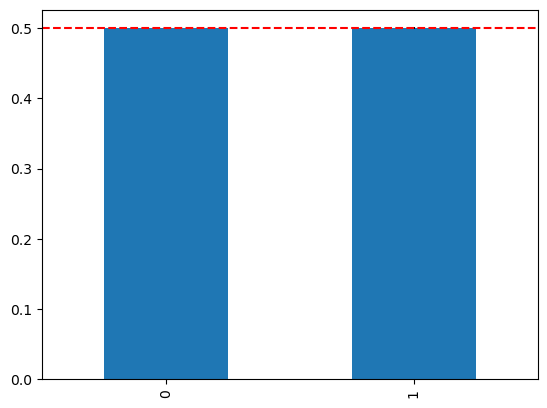

In [23]:
freqs =pd.Series(y).value_counts() /len(y) 
std_errors = np.sqrt(freqs*(1-freqs)/len(y)) 
expected_frequency = 1/len(np.unique(y)) 
freqs.plot(kind='bar',yerr=std_errors*1.96) 
plt.axhline(expected_frequency,color='red',linestyle='--')

In [24]:
balanced_data2

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,-1.090000,1,7,1,1,0,-1.650000,0.74,-1.650000,0
1,1,0.230000,1,28,0,0,1,0.740000,-1.58,-0.230000,0
2,0,1.800000,1,33,0,0,1,0.300000,0.22,1.180000,0
3,0,-1.090000,1,33,0,1,0,-0.180000,0.74,-1.020000,0
4,1,-0.690000,1,46,1,1,0,-0.100000,0.74,0.680000,0
...,...,...,...,...,...,...,...,...,...,...,...
639101,1,-0.251933,1,28,0,0,1,0.241800,0.22,-0.216867,1
639102,0,0.490000,1,28,0,0,1,0.952409,0.22,0.586832,1
639103,1,0.657236,1,28,0,0,1,0.401916,0.22,0.741916,1
639104,0,1.031491,1,28,0,0,1,0.596930,-1.58,0.616930,1


## Model Selection
# **ALGORITHM 1: KNN**

### Manual Splitting:

In [170]:
fit_model(balanced_data2, 'Response', 5)

Train Accuracy: 0.8975729079467901
Validation Accuracy: 0.8646231839838524
Test Accuracy: 0.8624024033421477


Train Precision: 0.9081265584216673
Validation Precision: 0.877499904966435
Test Precision: 0.8752768595671645


Train Recall: 0.8975729079467901
Validation Recall: 0.8646231839838524
Test Recall: 0.8624024033421477


Train F1 Score: 0.8969144960869397
Validation F1 Score: 0.863445598619536
Test F1 Score: 0.8611861945178274


AUC-ROC: 0.9170087345418462
AUC-PR: 0.907504985444402


### Cross-Validation:

In [171]:
fit_model_cv(balanced_data2, 'Response', 5, 10)

Fold 1:
  Accuracy: 0.8773607047300152
  Precision (Positive): 0.8198324391468669
  Precision (Negative): 0.9608422183017565
  Recall (Positive): 0.9681345775724852
  Recall (Negative): 0.7860997803577031
  F1 Score (Positive): 0.887833080511749
  F1 Score (Negative): 0.864731464862626
  AUC: 0.9295702991422379
Fold 2:
  Accuracy: 0.8759681431991363
  Precision (Positive): 0.8174699430499894
  Precision (Negative): 0.961359350344456
  Recall (Positive): 0.9686338217376362
  Recall (Negative): 0.7829916619647671
  F1 Score (Positive): 0.8866551324763716
  F1 Score (Negative): 0.8630560594281765
  AUC: 0.9280697457944711
Fold 3:
  Accuracy: 0.8742000594576833
  Precision (Positive): 0.8156884400967708
  Precision (Negative): 0.9601669049182862
  Recall (Positive): 0.9678315132605304
  Recall (Negative): 0.7800131822604438
  F1 Score (Positive): 0.8852706983646793
  F1 Score (Negative): 0.8607647547797174
  AUC: 0.928118477879318
Fold 4:
  Accuracy: 0.8754518001595969
  Precision (Positiv

### Feature Selection

### Variance Thresholding

In [172]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data2, threshold=0.7)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [1 3 7 8 9]
Selected features: ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [173]:
selected_features.append('Response')
var_thrsh_data=balanced_data2[selected_features]
fit_model(var_thrsh_data,'Response',5)

Train Accuracy: 0.8452732075845649
Validation Accuracy: 0.7770241196673473
Test Accuracy: 0.7766659886404531


Train Precision: 0.8527027315142445
Validation Precision: 0.7848785599164078
Test Precision: 0.7842578838953648


Train Recall: 0.8452732075845649
Validation Recall: 0.7770241196673473
Test Recall: 0.7766659886404531


Train F1 Score: 0.8444659966768362
Validation F1 Score: 0.7754533282171963
Test F1 Score: 0.7751208921551426


AUC-ROC: 0.8425249564736182
AUC-PR: 0.8320950679953552


### Wrapper Method 

#### Recursive Feature Elimination

In [174]:
rfe_selected_features = select_features_rfe(balanced_data2, 'Response', 3)
print("Selected features:", rfe_selected_features)

Selected features: ['Driving_License', 'Previously_Insured', 'Vehicle_Damage']


In [175]:
rfe_selected_features.append('Response')
wrapper_data_rfe=balanced_data2[rfe_selected_features]
fit_model(wrapper_data_rfe,'Response',5)

Train Accuracy: 0.8156927787035516
Validation Accuracy: 0.8161100288684958
Test Accuracy: 0.8162679350972446


Train Precision: 0.8570517586288463
Validation Precision: 0.8575463655023503
Test Precision: 0.8574513285539692


Train Recall: 0.8156927787035516
Validation Recall: 0.8161100288684958
Test Recall: 0.8162679350972446


Train F1 Score: 0.8102303266334437
Validation F1 Score: 0.8105882976286957
Test F1 Score: 0.8107521591239847


AUC-ROC: 0.8198915720497241
AUC-PR: 0.8661267872739659


#### Forward Feature Selection

In [176]:
ffs_selected_features = select_features_wrapper_ols(balanced_data2, 'Response', 4)
# Print the selected features
print("Selected features using OLS:", ffs_selected_features)

Selected features using OLS: ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage']


In [177]:
ffs_selected_features.append('Response')
wrapper_data_ffs=balanced_data2[ffs_selected_features]
fit_model(wrapper_data_ffs,'Response',5)

Train Accuracy: 0.8156927787035516
Validation Accuracy: 0.8161100288684958
Test Accuracy: 0.8162679350972446


Train Precision: 0.8570517586288463
Validation Precision: 0.8575463655023503
Test Precision: 0.8574513285539692


Train Recall: 0.8156927787035516
Validation Recall: 0.8161100288684958
Test Recall: 0.8162679350972446


Train F1 Score: 0.8102303266334437
Validation F1 Score: 0.8105882976286957
Test F1 Score: 0.8107521591239847


AUC-ROC: 0.8198915720497241
AUC-PR: 0.8661267872739659


### Principal Component Analysis

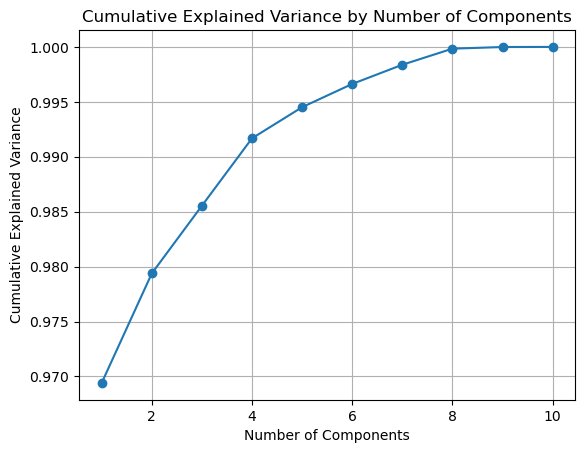

In [178]:
X_pca_df=perform_pca(balanced_data2,'Response')

In [179]:
X_pca_df = X_pca_df.merge(balanced_data2[['Response']], left_index=True, right_index=True)
fit_model(X_pca_df,'Response',5)

Train Accuracy: 0.8976015938956301
Validation Accuracy: 0.8646388308650378
Test Accuracy: 0.8624024033421477


Train Precision: 0.9081496782805777
Validation Precision: 0.8775115888306135
Test Precision: 0.8752723516639805


Train Recall: 0.8976015938956301
Validation Recall: 0.8646388308650378
Test Recall: 0.8624024033421477


Train F1 Score: 0.8969437554490314
Validation F1 Score: 0.8634617818473486
Test F1 Score: 0.861186604766942


AUC-ROC: 0.9170375505556282
AUC-PR: 0.9075371293687452


#### **COMMENT :** 

The perfromance scores of the model were quite high (around 90%) which could have been becuase of overfitting since it dropped to 86% with testing data so Cross validation is done to get an overall picture of the model.

CV showed that the average scores were also quite good and we can call this a good model.

Even so i performed feature selection to see what different features would do with the performance of my model.

VT didn't work well. Wrapper's gave a good generalised model. PCA performed similar to prior feature selection model.

AUC scores of the model were good showing that imbalance was handled well.



## INTERPRETATION:


# ALGORITHM 2: Logistic Regression

### Manual Splitting:

In [25]:
fit_model_LR(balanced_data2, 'Response')

Train Accuracy: 0.8160344022760997
Validation Accuracy: 0.8164855540169456
Test Accuracy: 0.8165574001345621


Train Precision: 0.8569679338363965
Validation Precision: 0.8575240006762056
Test Precision: 0.8573714887336041


Train Recall: 0.8160344022760997
Validation Recall: 0.8164855540169456
Test Recall: 0.8165574001345621


Train F1 Score: 0.8106386856026816
Validation F1 Score: 0.8110290587051381
Test F1 Score: 0.8110995975875821


AUC-ROC: 0.8565094380789887
AUC-PR: 0.7907851870674145


### Cross-Validation:

In [31]:
fit_model_LR_CV(balanced_data2, 'Response', 5)

Fold 1:
  Accuracy: 0.8176604966281235
  Precision (Positive): 0.7381489578097052
  Precision (Negative): 0.9785246328137934
  Recall (Positive): 0.985823575331772
  Recall (Negative): 0.6487643479897134
  F1 Score (Positive): 0.8441951721694487
  F1 Score (Negative): 0.7802325252468105
  AUC: 0.8568850207876098
Fold 2:
  Accuracy: 0.815468506739894
  Precision (Positive): 0.7354039296215056
  Precision (Negative): 0.9784152162040225
  Recall (Positive): 0.9857833247313846
  Recall (Negative): 0.6450017219247989
  F1 Score (Positive): 0.8423824065968579
  F1 Score (Negative): 0.7774706354073305
  AUC: 0.8557928364838677
Fold 3:
  Accuracy: 0.8147487502053653
  Precision (Positive): 0.734618884300413
  Precision (Negative): 0.9779092139955818
  Recall (Positive): 0.9854466926435379
  Recall (Negative): 0.6440908664226039
  F1 Score (Positive): 0.8417443609022557
  F1 Score (Negative): 0.7766490279860777
  AUC: 0.852082703854867
Fold 4:
  Accuracy: 0.8168689026059881
  Precision (Positiv

## Feature Engineering

### Variance Thresholding

In [32]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data2, threshold=0.8)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [1 3 7 8 9]
Selected features: ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [33]:
selected_features.append('Response')
var_thrsh_data=balanced_data2[selected_features]
fit_model_LR(var_thrsh_data,'Response')

Train Accuracy: 0.5769396265089461
Validation Accuracy: 0.5787703116076388
Test Accuracy: 0.5779286820735084


Train Precision: 0.5795940450643391
Validation Precision: 0.5815209867443982
Test Precision: 0.5809501694025072


Train Recall: 0.5769396265089461
Validation Recall: 0.5787703116076388
Test Recall: 0.5779286820735084


Train F1 Score: 0.5732564800459329
Validation F1 Score: 0.5753111672779523
Test F1 Score: 0.5742030289468602


AUC-ROC: 0.6741414105679064
AUC-PR: 0.5828078780459646


### Wrapper Method 

#### Recursive Feature Elimination

In [184]:
fit_model_LR(wrapper_data_rfe,'Response')

Train Accuracy: 0.8156927787035516
Validation Accuracy: 0.8161100288684958
Test Accuracy: 0.8162679350972446


Train Precision: 0.8570517586288463
Validation Precision: 0.8575463655023503
Test Precision: 0.8574513285539692


Train Recall: 0.8156927787035516
Validation Recall: 0.8161100288684958
Test Recall: 0.8162679350972446


Train F1 Score: 0.8102303266334437
Validation F1 Score: 0.8105882976286957
Test F1 Score: 0.8107521591239847


AUC-ROC: 0.8199498123370139
AUC-PR: 0.8661465586708865


#### Forward feature selection

In [185]:
fit_model_LR(wrapper_data_ffs,'Response')

Train Accuracy: 0.8156927787035516
Validation Accuracy: 0.8161100288684958
Test Accuracy: 0.8162679350972446


Train Precision: 0.8570517586288463
Validation Precision: 0.8575463655023503
Test Precision: 0.8574513285539692


Train Recall: 0.8156927787035516
Validation Recall: 0.8161100288684958
Test Recall: 0.8162679350972446


Train F1 Score: 0.8102303266334437
Validation F1 Score: 0.8105882976286957
Test F1 Score: 0.8107521591239847


AUC-ROC: 0.8268507146607794
AUC-PR: 0.8222078997590039


### Principal Component Analysis

In [186]:
fit_model_LR(X_pca_df,'Response')

Train Accuracy: 0.8160317944625688
Validation Accuracy: 0.8164855540169456
Test Accuracy: 0.8165574001345621


Train Precision: 0.8569635664962376
Validation Precision: 0.8575240006762056
Test Precision: 0.8573714887336041


Train Recall: 0.8160317944625688
Validation Recall: 0.8164855540169456
Test Recall: 0.8165574001345621


Train F1 Score: 0.8106361728837205
Validation F1 Score: 0.8110290587051381
Test F1 Score: 0.8110995975875821


AUC-ROC: 0.8565330244546132
AUC-PR: 0.7907945436719028


#### **Comment :**
This model seems to be a good well generalized model with low chances of overfitting as the train, val and test scores are similar. However, low AUC scores and in Cross Validation, a decrease in average positive precision and negative recall shows that the model performs poorly in terms of accurately identifying true positives and true negatives. 
This is why feature selection was important.

Wrapper's methods gave a good performance with high and well generalised precision and F1 scores. Also the AUC scores are good so we can safely say that imbalance is handled well. 

PCA performs pretty similar to how model performed before FS. VT performed poorly.

# ALGORITHM 3: DECISION TREES

### Manual Splitting:

In [38]:
fit_model_DT(balanced_data2, 'Response')

Train Accuracy: 0.9998774327640476
Validation Accuracy: 0.8808489997731203
Test Accuracy: 0.8810689865594342


Train Precision: 0.9998774627759265
Validation Precision: 0.8809079345782247
Test Precision: 0.8811529740008516


Train Recall: 0.9998774327640476
Validation Recall: 0.8808489997731203
Test Recall: 0.8810689865594342


Train F1 Score: 0.9998774327490823
Validation F1 Score: 0.8808436110324858
Test F1 Score: 0.8810606462318575


AUC-ROC: 0.8811133746917189
AUC-PR: 0.9100765643088563


### Cross-Validation:

In [188]:
fit_model_DT_CV(balanced_data2, 'Response', 10)

Fold 1:
  Accuracy: 0.8852623179108448
  Precision (Positive): 0.8809905631283538
  Precision (Negative): 0.8896617436874702
  Recall (Positive): 0.8915764177148029
  Recall (Negative): 0.8789143395042359
  F1 Score (Positive): 0.8862518808072347
  F1 Score (Negative): 0.884255386315208
  AUC: 0.8853535085219442
Fold 2:
  Accuracy: 0.8872338095163587
  Precision (Positive): 0.8834095968340341
  Precision (Negative): 0.8911521525643868
  Recall (Positive): 0.8926551907276079
  Recall (Negative): 0.8817942448749295
  F1 Score (Positive): 0.8880083290600282
  F1 Score (Negative): 0.8864485024185035
  AUC: 0.8873006331076649
Fold 3:
  Accuracy: 0.884620800801114
  Precision (Positive): 0.8799347170043728
  Precision (Negative): 0.8894614626077552
  Recall (Positive): 0.891575663026521
  Recall (Negative): 0.8776246822133643
  F1 Score (Positive): 0.8857169425330109
  F1 Score (Negative): 0.88350342822838
  AUC: 0.8847302814619725
Fold 4:
  Accuracy: 0.8856378401214189
  Precision (Positive

## Feature Selection

### Variance Thresholding

In [39]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data2, threshold=0.8)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [1 3 7 8 9]
Selected features: ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [40]:
selected_features.append('Response')
var_thrsh_data=balanced_data2[selected_features]
fit_model_DT(var_thrsh_data,'Response')

Train Accuracy: 0.9993454388037438
Validation Accuracy: 0.8470908536156031
Test Accuracy: 0.8476240396801803


Train Precision: 0.9993462140019135
Validation Precision: 0.8471789865678191
Test Precision: 0.847716229575047


Train Recall: 0.9993454388037438
Validation Recall: 0.8470908536156031
Test Recall: 0.8476240396801803


Train F1 Score: 0.9993454381930633
Validation F1 Score: 0.8470797948351474
Test F1 Score: 0.8476112752372009


AUC-ROC: 0.847803355785971
AUC-PR: 0.8852632731715232


### Wrapper Method 

#### Recursive Feature Elimination

In [49]:
fit_model_DT(wrapper_data_rfe,'Response')

Train Accuracy: 0.8156927787035516
Validation Accuracy: 0.8161100288684958
Test Accuracy: 0.8162679350972446


Train Precision: 0.8570517586288463
Validation Precision: 0.8575463655023503
Test Precision: 0.8574513285539692


Train Recall: 0.8156927787035516
Validation Recall: 0.8161100288684958
Test Recall: 0.8162679350972446


Train F1 Score: 0.8102303266334437
Validation F1 Score: 0.8105882976286957
Test F1 Score: 0.8107521591239847


AUC-ROC: 0.8199499171207381
AUC-PR: 0.8661466019835519


#### Forward Feature Selection

In [192]:
fit_model_LR(wrapper_data_ffs,'Response')

Train Accuracy: 0.8156927787035516
Validation Accuracy: 0.8161100288684958
Test Accuracy: 0.8162679350972446


Train Precision: 0.8570517586288463
Validation Precision: 0.8575463655023503
Test Precision: 0.8574513285539692


Train Recall: 0.8156927787035516
Validation Recall: 0.8161100288684958
Test Recall: 0.8162679350972446


Train F1 Score: 0.8102303266334437
Validation F1 Score: 0.8105882976286957
Test F1 Score: 0.8107521591239847


AUC-ROC: 0.8268507146607794
AUC-PR: 0.8222078997590039


### Principal Component Analysis

In [51]:
fit_model_DT(X_pca_df,'Response')

Train Accuracy: 0.9998299112049265
Validation Accuracy: 0.8106789130065026
Test Accuracy: 0.809475212937159


Train Precision: 0.9998299457797839
Validation Precision: 0.8129712744357285
Test Precision: 0.8116406154050766


Train Recall: 0.9998299112049265
Validation Recall: 0.8106789130065026
Test Recall: 0.809475212937159


Train F1 Score: 0.999829875571528
Validation F1 Score: 0.8118034711064329
Test F1 Score: 0.8105378859043886


AUC-ROC: 0.6617873339184821
AUC-PR: 0.48081403766047615


### **Comment :**
Decision Tree performed well. There was overfitting in the training data but validation and testinf score was good 88%. 

Cross Valiadation validates it as the average precision, recall, accuracy, F1 score, all the performance metrics are a good 88% which makes it a good model. The AUC-PR is also a good 88% which means that the imbalance of the dataset was handled well.  But we still cant rule out overfitting so we did feature selection.

The Wrapper's methods gave a better performance of around 82% which was consistent with training, validation and testing datasets. This is a better fitting model as the drop from 90% to 82% gives evidence of reduction in overfitting.

AUC-PR scores of all the selectors were good except PCA. Hence PCA is not a good method.




# ALGORITHM 4: Random Forest

In [42]:
fit_model_RF(balanced_data2, 'Response')

Train Accuracy: 0.9998748249505167
Validation Accuracy: 0.9005014825419924
Test Accuracy: 0.9001032686079079


Train Precision: 0.9998748327966449
Validation Precision: 0.9030090236279572
Test Precision: 0.9028319974718005


Train Recall: 0.9998748249505167
Validation Recall: 0.9005014825419924
Test Recall: 0.9001032686079079


Train F1 Score: 0.9998748249568705
Validation F1 Score: 0.9003425024257709
Test F1 Score: 0.8999258454903062


AUC-ROC: 0.9703902967582324
AUC-PR: 0.969098952372052


### Cross-Validation:

In [195]:
fit_model_RF_CV(balanced_data2, 'Response', KF=5, n_estimators=30)

Fold 1:
  Accuracy: 0.9046330052729578
  Precision: 0.881547969393761
  Recall: 0.9353629976580796
  F1 Score (Positive): 0.9076585107188849
  F1 Score (Negative): 0.9014025268130126
  AUC-ROC: 0.9714820512507893
  AUC-PR: 0.9673131396226784
Fold 2:
  Accuracy: 0.9051094890510949
  Precision: 0.8814382896015549
  Recall: 0.9362361000328439
  F1 Score (Positive): 0.9080111942845441
  F1 Score (Negative): 0.9020187577248382
  AUC-ROC: 0.9710689727532702
  AUC-PR: 0.9665438182779158
Fold 3:
  Accuracy: 0.9026607521455786
  Precision: 0.8796570905817951
  Recall: 0.9329295964195734
  F1 Score (Positive): 0.9055104954585498
  F1 Score (Negative): 0.8996337705499895
  AUC-ROC: 0.9707540840842981
  AUC-PR: 0.9664790631118636
Fold 4:
  Accuracy: 0.9055163079619155
  Precision: 0.8836869164401371
  Recall: 0.9343319951889283
  F1 Score (Positive): 0.9083040385097223
  F1 Score (Negative): 0.902553758018316
  AUC-ROC: 0.9717867333199717
  AUC-PR: 0.9677055262614591
Fold 5:
  Accuracy: 0.90350568

## Feature Engineering

### Variance Thresholding

In [52]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data2, threshold=1.0)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)

Indices of selected features: [3 7 8]
Selected features: ['Region_Code', 'Annual_Premium', 'Policy_Sales_Channel']


In [53]:
selected_features.append('Response')
var_thrsh_data=balanced_data2[selected_features]
fit_model_RF(var_thrsh_data,'Response')

Train Accuracy: 0.8892096499531897
Validation Accuracy: 0.8239178225800142
Test Accuracy: 0.8232072726134781


Train Precision: 0.8921077999204994
Validation Precision: 0.8284551209655526
Test Precision: 0.8281425911797377


Train Recall: 0.8892096499531897
Validation Recall: 0.8239178225800142
Test Recall: 0.8232072726134781


Train F1 Score: 0.888999802743346
Validation F1 Score: 0.8233193786275511
Test F1 Score: 0.8225635778419917


AUC-ROC: 0.908372380920808
AUC-PR: 0.9219677922952014


### Wrapper Method 

#### Recursive Feature Elimination

In [54]:
fit_model_RF(wrapper_data_rfe,'Response')

Train Accuracy: 0.8156927787035516
Validation Accuracy: 0.8161100288684958
Test Accuracy: 0.8162679350972446


Train Precision: 0.8570517586288463
Validation Precision: 0.8575463655023503
Test Precision: 0.8574513285539692


Train Recall: 0.8156927787035516
Validation Recall: 0.8161100288684958
Test Recall: 0.8162679350972446


Train F1 Score: 0.8102303266334437
Validation F1 Score: 0.8105882976286957
Test F1 Score: 0.8107521591239847


AUC-ROC: 0.8199499171207381
AUC-PR: 0.8661466019835519


#### Forward Feature Selection

In [58]:
ffs_selected_features.append('Response')
wrapper_data_ffs=balanced_data2[ffs_selected_features]
fit_model_RF(wrapper_data_ffs,'Response')

Train Accuracy: 0.8482721931451014
Validation Accuracy: 0.83747584512717
Test Accuracy: 0.8368512462643364


Train Precision: 0.8505844119153647
Validation Precision: 0.8405489883500173
Test Precision: 0.8398177658111237


Train Recall: 0.8482721931451014
Validation Recall: 0.83747584512717
Test Recall: 0.8368512462643364


Train F1 Score: 0.8480150490277215
Validation F1 Score: 0.837116932820882
Test F1 Score: 0.8365105862310466


AUC-ROC: 0.9271862350588542
AUC-PR: 0.940197611057429


### Principal Component Analysis

In [55]:
fit_model_RF(X_pca_df,'Response')

Train Accuracy: 0.9998124662003035
Validation Accuracy: 0.8352370111603931
Test Accuracy: 0.8326856903612408


Train Precision: 0.9998124524630243
Validation Precision: 0.8213996582691873
Test Precision: 0.8180663939089065


Train Recall: 0.9998124662003035
Validation Recall: 0.8352370111603931
Test Recall: 0.8326856903612408


Train F1 Score: 0.9998124551243841
Validation F1 Score: 0.8269487664293164
Test F1 Score: 0.8238105049389853


AUC-ROC: 0.8745547263254153
AUC-PR: 0.47502009854924787


#### **Comment :**
The model gave clear evidence of overfitting since the scores were quite high. Recursive feature elimination, however gives a well generalised model with high enough AUC scores to handle imbalance.

# ALGORITHM 5: MultiLayer Perecptron 

### MODEL SELECTION

### Manual Splitting:

In [201]:
fit_model_MLP(balanced_data2, 'Response')

Train Accuracy: 0.8378174686997181
Validation Accuracy: 0.838031309409252
Test Accuracy: 0.8368512462643364


Train Precision: 0.8472644852843269
Validation Precision: 0.8473959591075141
Test Precision: 0.8461791985166983


Train Recall: 0.8378174686997181
Validation Recall: 0.838031309409252
Test Recall: 0.8368512462643364


Train F1 Score: 0.8367212599288223
Validation F1 Score: 0.836917641771041
Test F1 Score: 0.8357162992169904


AUC-ROC: 0.8930379313034482
AUC-PR: 0.8423074800988984


### Cross-Validation:

In [202]:
fit_model_MLP_CV(balanced_data2, 'Response', KF=5)

Fold 1:
  Accuracy: 0.836334903224797
  Precision: 0.7825010479983232
  Recall: 0.932599531615925
  F1 Score (Positive): 0.8509822916815067
  F1 Score (Negative): 0.8184941609259228
  AUC-ROC: 0.8919961042174889
  AUC-PR: 0.8409024641762263
Fold 2:
  Accuracy: 0.8358876866868511
  Precision: 0.7873251116877558
  Recall: 0.9205961932466883
  F1 Score (Positive): 0.848761003886057
  F1 Score (Negative): 0.8206189445959928
  AUC-ROC: 0.888790064689991
  AUC-PR: 0.8329840588884939
Fold 3:
  Accuracy: 0.8326174885191009
  Precision: 0.7741390429511157
  Recall: 0.9392203808897861
  F1 Score (Positive): 0.8487269590548174
  F1 Score (Negative): 0.8126680033972804
  AUC-ROC: 0.8856798005610582
  AUC-PR: 0.8300428923526237
Fold 4:
  Accuracy: 0.8371394371816837
  Precision: 0.792656821568893
  Recall: 0.9138849404083162
  F1 Score (Positive): 0.848965021874932
  F1 Score (Negative): 0.8233047286801966
  AUC-ROC: 0.88994453076557
  AUC-PR: 0.8355022928266264
Fold 5:
  Accuracy: 0.83517575359291

## Feature Selection

### Variance Thresholding

In [203]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data2, threshold=0.5)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [1 3 7 8 9]
Selected features: ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [204]:
selected_features.append('Response')
var_thrsh_data=balanced_data2[selected_features]
fit_model_MLP(var_thrsh_data,'Response')

Train Accuracy: 0.74665091547294
Validation Accuracy: 0.7469742843507717
Test Accuracy: 0.7460531050992787


Train Precision: 0.7548232651954917
Validation Precision: 0.7549140559475945
Test Precision: 0.7539068796382049


Train Recall: 0.74665091547294
Validation Recall: 0.7469742843507717
Test Recall: 0.7460531050992787


Train F1 Score: 0.744632824048312
Validation F1 Score: 0.7449584513921694
Test F1 Score: 0.744016108065532


AUC-ROC: 0.794329094493593
AUC-PR: 0.7391345304229107


### Wrapper Method 

#### Recursive Feature Elimination

In [205]:
fit_model_MLP(wrapper_data_rfe,'Response')

Train Accuracy: 0.8156927787035516
Validation Accuracy: 0.8161100288684958
Test Accuracy: 0.8162679350972446


Train Precision: 0.8570517586288463
Validation Precision: 0.8575463655023503
Test Precision: 0.8574513285539692


Train Recall: 0.8156927787035516
Validation Recall: 0.8161100288684958
Test Recall: 0.8162679350972446


Train F1 Score: 0.8102303266334437
Validation F1 Score: 0.8105882976286957
Test F1 Score: 0.8107521591239847


AUC-ROC: 0.8199496659335863
AUC-PR: 0.8661465052909486


#### Forward Feature Selection

In [206]:
fit_model_MLP(wrapper_data_ffs,'Response')

Train Accuracy: 0.8156927787035516
Validation Accuracy: 0.8161100288684958
Test Accuracy: 0.8162679350972446


Train Precision: 0.8570517586288463
Validation Precision: 0.8575463655023503
Test Precision: 0.8574513285539692


Train Recall: 0.8156927787035516
Validation Recall: 0.8161100288684958
Test Recall: 0.8162679350972446


Train F1 Score: 0.8102303266334437
Validation F1 Score: 0.8105882976286957
Test F1 Score: 0.8107521591239847


AUC-ROC: 0.8268507484461858
AUC-PR: 0.8222079249701053


### Principal Component Analysis

In [207]:
fit_model_MLP(X_pca_df,'Response')

Train Accuracy: 0.8388110456549915
Validation Accuracy: 0.8388136534685224
Test Accuracy: 0.8378995791021889


Train Precision: 0.8514925271001602
Validation Precision: 0.851448520409449
Test Precision: 0.8503551811646756


Train Recall: 0.8388110456549915
Validation Recall: 0.8388136534685224
Test Recall: 0.8378995791021889


Train F1 Score: 0.83736028544728
Validation F1 Score: 0.8373349689511987
Test F1 Score: 0.8364136105586326


AUC-ROC: 0.8936148531062151
AUC-PR: 0.8428374237132632


#### **COMMENT :**
The model performed well. The scores do not hint at overfitting since the scored are consistent and not too high. Cross validation, however, showed a lower precision score.
After feature selection, Wrapper's method increased the precision, making it a better model. The AUC scores are also good.

# CI ALGORITHM 3: Class Weighting

First i will apply tomek links to downsize my data and see if imbalance is being handled in any way then apply class weighting technique in different algorithms to see how well it handles class imbalance and the effect of change of algorithm on the CI technique.

#### Applying Tomek Links

In [60]:
from imblearn.under_sampling import TomekLinks

# Instantiate TomekLinks
tl = TomekLinks()

X = df_data.drop(columns=['Response'])
y = df_data['Response']

# Apply TomekLinks
data_resampled, target_resampled = tl.fit_resample(X,y)


In [61]:
balanced_data3 = pd.concat([pd.DataFrame(data_resampled, columns=X.columns), pd.Series(target_resampled, name='Response')], axis=1)

### Checking if the dataset has become balanced

In [123]:
import numpy as np 
from scipy.stats import norm,chisquare 
import matplotlib.pyplot as plt
X = balanced_data3.drop(columns=['Response'])
y = balanced_data3['Response']

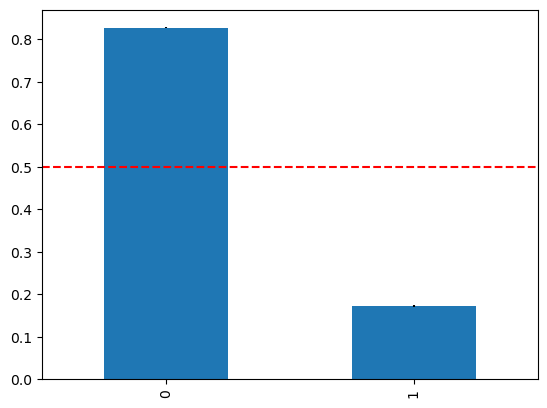

In [124]:
freqs =pd.Series(y).value_counts() /len(y) 
std_errors = np.sqrt(freqs*(1-freqs)/len(y)) 
expected_frequency = 1/len(np.unique(y)) 
freqs.plot(kind='bar',yerr=std_errors*1.96) 
plt.axhline(expected_frequency,color='red',linestyle='--')

The dataset hasnot balanced so we will use class weighting in each of the algorithm so that it handles the imbalance of the dataset.

## Model Selection
# **ALGORITHM 1: KNN**

### Manual Splitting:

In [125]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, average_precision_score, precision_recall_curve

def fit_model(data, target, k, class_weights=None, zero_division=1):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is spit into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    X_train = np.ascontiguousarray(X_train)
    X_val = np.ascontiguousarray(X_val)
    X_test = np.ascontiguousarray(X_test)

    # Instantiate the KNN classifier with the desired number of neighbors. 
    # We are taking k=5
    if class_weights:
        knn_model = KNeighborsClassifier(n_neighbors=k, weights='distance')
    else:
        knn_model = KNeighborsClassifier(n_neighbors=k)

    # Fit the model to the training data
    knn_model.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = knn_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    
    # Make predictions on the validation set
    y_val_pred = knn_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    accuracy_val = accuracy_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred, average='weighted')
    recall_val = recall_score(y_val, y_val_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')
    
    # Make predictions on the test set
    y_test_pred = knn_model.predict(X_test)

    # Evaluate the model's performance on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted') 

    # Calculate AUC-ROC
    y_test_proba = knn_model.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)

    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    auc_pr = auc(recall, precision)
    
    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {roc_auc}")
    print(f"AUC-PR: {auc_pr}")
    
# Example usage with class weighting
fit_model(balanced_data3, 'Response', 5, class_weights='balanced', zero_division=1)


Train Accuracy: 0.9997745976107347
Validation Accuracy: 0.8579964947628445
Test Accuracy: 0.8580812541399867


Train Precision: 0.9997746589338208
Validation Precision: 0.8535026089008948
Test Precision: 0.8539409413496484


Train Recall: 0.9997745976107347
Validation Recall: 0.8579964947628445
Test Recall: 0.8580812541399867


Train F1 Score: 0.9997745389302357
Validation F1 Score: 0.8554912707464788
Test F1 Score: 0.8558015104402454


AUC-ROC: 0.8774794232054373
AUC-PR: 0.5951119025980073


### Cross Validation

In [126]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def fit_model_cv(data, target, k, KF, class_weights=None):

    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    features = data.drop(columns=[target])
    X = features.values
    y = data[target_column_name].values

    # Number of neighbors for KNN
    k_neighbors = k
    # Number of folds for cross-validation
    num_folds = KF

    # Create KNN classifier
    if class_weights:
        knn = KNeighborsClassifier(n_neighbors=k_neighbors, weights='distance')
    else:
        knn = KNeighborsClassifier(n_neighbors=k_neighbors)

    # Create KFold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Initialize variables to store overall metrics
    overall_accuracy = 0
    overall_precision_pos = 0
    overall_precision_neg = 0
    overall_recall_pos = 0
    overall_recall_neg = 0
    overall_f1_pos = 0
    overall_f1_neg = 0
    overall_auc = 0

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train KNN model
        knn.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = knn.predict(X_test)

        # Calculate metrics for this fold
        fold_accuracy = accuracy_score(y_test, predictions)
        fold_precision_pos = precision_score(y_test, predictions, pos_label=1)
        fold_precision_neg = precision_score(y_test, predictions, pos_label=0)
        fold_recall_pos = recall_score(y_test, predictions, pos_label=1)
        fold_recall_neg = recall_score(y_test, predictions, pos_label=0)
        fold_f1_pos = f1_score(y_test, predictions, pos_label=1)
        fold_f1_neg = f1_score(y_test, predictions, pos_label=0)
        fold_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

        print(f"Fold {fold}:")
        print(f"  Accuracy: {fold_accuracy}")
        print(f"  Precision (Positive): {fold_precision_pos}")
        print(f"  Precision (Negative): {fold_precision_neg}")
        print(f"  Recall (Positive): {fold_recall_pos}")
        print(f"  Recall (Negative): {fold_recall_neg}")
        print(f"  F1 Score (Positive): {fold_f1_pos}")
        print(f"  F1 Score (Negative): {fold_f1_neg}")
        print(f"  AUC: {fold_auc}")

        # Add fold metrics to overall metrics
        overall_accuracy += fold_accuracy
        overall_precision_pos += fold_precision_pos
        overall_precision_neg += fold_precision_neg
        overall_recall_pos += fold_recall_pos
        overall_recall_neg += fold_recall_neg
        overall_f1_pos += fold_f1_pos
        overall_f1_neg += fold_f1_neg
        overall_auc += fold_auc

    # Calculate and print average metrics across all folds
    average_accuracy = overall_accuracy / num_folds
    average_precision_pos = overall_precision_pos / num_folds
    average_precision_neg = overall_precision_neg / num_folds
    average_recall_pos = overall_recall_pos / num_folds
    average_recall_neg = overall_recall_neg / num_folds
    average_f1_pos = overall_f1_pos / num_folds
    average_f1_neg = overall_f1_neg / num_folds
    average_auc = overall_auc / num_folds

    print("\nAverage Metrics:")
    print(f"  Average Accuracy: {average_accuracy}")
    print(f"  Average Precision (Positive): {average_precision_pos}")
    print(f"  Average Precision (Negative): {average_precision_neg}")
    print(f"  Average Recall (Positive): {average_recall_pos}")
    print(f"  Average Recall (Negative): {average_recall_neg}")
    print(f"  Average F1 Score (Positive): {average_f1_pos}")
    print(f"  Average F1 Score (Negative): {average_f1_neg}")
    print(f"  Average AUC: {average_auc}")

# Example usage with class weighting
fit_model_cv(balanced_data3, 'Response', 5, 10, class_weights='balanced')

Fold 1:
  Accuracy: 0.8640704349746081
  Precision (Positive): 0.6185140493018445
  Precision (Negative): 0.9108803522723539
  Recall (Positive): 0.5695238095238095
  Recall (Negative): 0.9260657490311373
  F1 Score (Positive): 0.5930088422444426
  F1 Score (Negative): 0.9184102844457698
  AUC: 0.8834541733749941
Fold 2:
  Accuracy: 0.8650088319717377
  Precision (Positive): 0.6205357142857143
  Precision (Negative): 0.9118324125230203
  Recall (Positive): 0.5741064336775218
  Recall (Negative): 0.9261783077796707
  F1 Score (Positive): 0.5964188464394752
  F1 Score (Negative): 0.9189493744303587
  AUC: 0.8858806936451641
Fold 3:
  Accuracy: 0.8687624199602562
  Precision (Positive): 0.635201401050788
  Precision (Negative): 0.9124565886901251
  Recall (Positive): 0.5758056834418162
  Recall (Negative): 0.930411251795677
  F1 Score (Positive): 0.6040469647764177
  F1 Score (Negative): 0.9213464560416839
  AUC: 0.8900754946883092
Fold 4:
  Accuracy: 0.8647328328549349
  Precision (Posit

### Feature Selection

### Variance Thresholding

In [127]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data3, threshold=0.8)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)

Indices of selected features: [1 3 7 8 9]
Selected features: ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [128]:
selected_features.append('Response')
var_thrsh_data=balanced_data3[selected_features]
fit_model(var_thrsh_data,'Response',5, class_weights='balanced', zero_division=1)

Train Accuracy: 0.9990845902966572
Validation Accuracy: 0.8045761285069621
Test Accuracy: 0.8070904173106646


Train Precision: 0.999085372425713
Validation Precision: 0.778233793847748
Test Precision: 0.7797958575639939


Train Recall: 0.9990845902966572
Validation Recall: 0.8045761285069621
Test Recall: 0.8070904173106646


Train F1 Score: 0.9990836785934073
Validation F1 Score: 0.7879997763269747
Test F1 Score: 0.7897685298365812


AUC-ROC: 0.7328486910725611
AUC-PR: 0.35450594217264925


### Wrapper Method 

#### Recursive Feature Elimination

In [129]:
rfe_selected_features = select_features_rfe(balanced_data3, 'Response', 3)
# Print the selected features
print("Selected features:", rfe_selected_features)

Selected features: ['Driving_License', 'Previously_Insured', 'Vehicle_Damage']


In [130]:
rfe_selected_features.append('Response')
wrapper_data_rfe=balanced_data3[rfe_selected_features]
fit_model(wrapper_data_rfe,'Response',5, class_weights='balanced', zero_division=1)

C:\Users\hinaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hinaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hinaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Accuracy: 0.8282755797211451
Validation Accuracy: 0.8246277410540551
Test Accuracy: 0.8266449547361449


Train Precision: 0.6860404359623988
Validation Precision: 0.6800109113159138
Test Precision: 0.683341881190723


Train Recall: 0.8282755797211451
Validation Recall: 0.8246277410540551
Test Recall: 0.8266449547361449


Train F1 Score: 0.7504781484496293
Validation F1 Score: 0.7453694756642071
Test F1 Score: 0.7481934345467045


AUC-ROC: 0.8356730497205298
AUC-PR: 0.692475842492646


#### Forward Feature Selection

In [131]:
ffs_selected_features = select_features_wrapper_ols(balanced_data3, 'Response', 4)
# Print the selected features
print("Selected features using OLS:", ffs_selected_features)

Selected features using OLS: ['Gender', 'Age', 'Driving_License', 'Region_Code']


In [132]:
ffs_selected_features.append('Response')
wrapper_data_ffs=balanced_data3[ffs_selected_features]
fit_model(wrapper_data_ffs,'Response',5, class_weights='balanced', zero_division=1)

Train Accuracy: 0.8092773783402104
Validation Accuracy: 0.8013744945696425
Test Accuracy: 0.8032540295871053


Train Precision: 0.7686303205331182
Validation Precision: 0.7567602273219702
Test Precision: 0.7610715101869581


Train Recall: 0.8092773783402104
Validation Recall: 0.8013744945696425
Test Recall: 0.8032540295871053


Train F1 Score: 0.7811976237871123
Validation F1 Score: 0.771023283285686
Test F1 Score: 0.7749012347272419


AUC-ROC: 0.6881413094393932
AUC-PR: 0.30424159215695673


### Principal Component Analysis

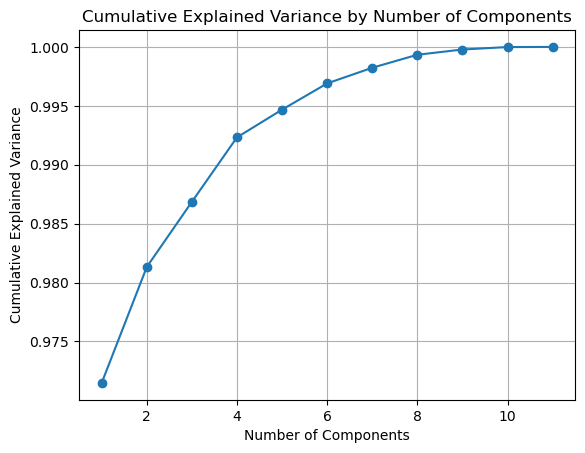

In [133]:
X_pca_df=perform_pca(balanced_data3,'Response')

In [134]:
X_pca_df = X_pca_df.merge(balanced_data3[['Response']], left_index=True, right_index=True)
fit_model(X_pca_df,'Response',5, class_weights='balanced', zero_division=1)

Train Accuracy: 0.9997745976107347
Validation Accuracy: 0.8579412941777182
Test Accuracy: 0.8580674541841466


Train Precision: 0.9997746589338208
Validation Precision: 0.8534453433974213
Test Precision: 0.8539063503592366


Train Recall: 0.9997745976107347
Validation Recall: 0.8579412941777182
Test Recall: 0.8580674541841466


Train F1 Score: 0.9997745389302357
Validation F1 Score: 0.8554350963133386
Test F1 Score: 0.8557751195754325


AUC-ROC: 0.8774667213573497
AUC-PR: 0.5949886574439727


#### **COMMENT :** 
KNN doesnt seem to handle imbalance well since the AUC-PR is low thorughout. The precision is also lower than 75% with each Feature selection method. 

# ALGORITHM 2: Logistic Regression

### Manual Splitting:

In [135]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, average_precision_score, precision_recall_curve

def fit_model_LR(data, target, class_weights=None):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is split into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    # Instantiate the Logistic Regression classifier
    if class_weights:
        log_reg_model = LogisticRegression(max_iter=1000, class_weight='balanced')
    else:
        log_reg_model = LogisticRegression(max_iter=1000)

    # Fit the model to the training data
    log_reg_model.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = log_reg_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    
    # Make predictions on the validation set
    y_val_pred = log_reg_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    accuracy_val = accuracy_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred, average='weighted')
    recall_val = recall_score(y_val, y_val_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')
    
    # Make predictions on the test set
    y_test_pred = log_reg_model.predict(X_test)

    # Evaluate the model's performance on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted') 

    # Calculate AUC-ROC
    y_test_proba = log_reg_model.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)

    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    auc_pr = auc(recall, precision)
    
    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {roc_auc}")
    print(f"AUC-PR: {auc_pr}")

# Example usage with class weighting
fit_model_LR(balanced_data3, 'Response', class_weights='balanced')


Train Accuracy: 0.7390760342059626
Validation Accuracy: 0.7412472572209265
Test Accuracy: 0.7384632369176418


Train Precision: 0.8922231522323751
Validation Precision: 0.8911265365553653
Test Precision: 0.8917114558330219


Train Recall: 0.7390760342059626
Validation Recall: 0.7412472572209265
Test Recall: 0.7384632369176418


Train F1 Score: 0.7709358577668356
Validation F1 Score: 0.7720203432231774
Test F1 Score: 0.7700522682386287


AUC-ROC: 0.8764789433631583
AUC-PR: 0.49276430413805256


## Feature Engineering

### Variance Thresholding

In [136]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data3, threshold=0.8)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [1 3 7 8 9]
Selected features: ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [137]:
selected_features.append('Response')
var_thrsh_data=balanced_data3[selected_features]
fit_model_LR(var_thrsh_data,'Response', class_weights='balanced')

Train Accuracy: 0.6432662186219174
Validation Accuracy: 0.6415964009218498
Test Accuracy: 0.6451755354382867


Train Precision: 0.7576393057601344
Validation Precision: 0.7535768232246146
Test Precision: 0.7565286910853359


Train Recall: 0.6432662186219174
Validation Recall: 0.6415964009218498
Test Recall: 0.6451755354382867


Train F1 Score: 0.6830867441476077
Validation F1 Score: 0.680495524269549
Test F1 Score: 0.684050948787422


AUC-ROC: 0.6849837692760512
AUC-PR: 0.2378623041271471


### Wrapper Method 

#### Recursive Feature Elimination

In [138]:
fit_model_LR(wrapper_data_rfe,'Response', class_weights='balanced')

Train Accuracy: 0.7381882247951829
Validation Accuracy: 0.7403088472737811
Test Accuracy: 0.7375248399205122


Train Precision: 0.8923976086385089
Validation Precision: 0.8911948598540771
Test Precision: 0.8918491654062485


Train Recall: 0.7381882247951829
Validation Recall: 0.7403088472737811
Test Recall: 0.7375248399205122


Train F1 Score: 0.7701754970740123
Validation F1 Score: 0.7712118192339554
Test F1 Score: 0.7692452245845215


AUC-ROC: 0.8397541011513945
AUC-PR: 0.6936513789518497


#### Forward Feature Selection

In [139]:
fit_model_LR(wrapper_data_ffs,'Response', class_weights='balanced')

Train Accuracy: 0.622676400369844
Validation Accuracy: 0.6228006016863779
Test Accuracy: 0.6273735924045043


Train Precision: 0.7762464595664659
Validation Precision: 0.7720957296348765
Test Precision: 0.7761439800213028


Train Recall: 0.622676400369844
Validation Recall: 0.6228006016863779
Test Recall: 0.6273735924045043


Train F1 Score: 0.6684037848997215
Validation F1 Score: 0.6672589526848144
Test F1 Score: 0.671842753771311


AUC-ROC: 0.6559140370815612
AUC-PR: 0.21574281289997696


### Principal Component Analysis

In [140]:
fit_model_LR(X_pca_df,'Response', class_weights='balanced')

Train Accuracy: 0.7390622340596811
Validation Accuracy: 0.741261057367208
Test Accuracy: 0.7384632369176418


Train Precision: 0.8922278350827152
Validation Precision: 0.8911289109647111
Test Precision: 0.8917114558330219


Train Recall: 0.7390622340596811
Validation Recall: 0.741261057367208
Test Recall: 0.7384632369176418


Train F1 Score: 0.770924084154347
Validation F1 Score: 0.7720322948220286
Test F1 Score: 0.7700522682386287


AUC-ROC: 0.8764780396953723
AUC-PR: 0.4927527925016587


#### **Comment :**
The model did not give a very good performance as the accuracy, recall and f1 score are low. However, precision and AUC-ROC is good. AUC-PR though, is still 49% which shows that imbalance was not handled well.

The feature selection methods did not really help with the scores.

# ALGORITHM 3: DECISION TREES

### Manual Splitting:

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def fit_model_DT(data, target, class_weights=None):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is split into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    # Instantiate the Decision Tree classifier
    if class_weights:
        dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
    else:
        dt_model = DecisionTreeClassifier(random_state=42)

    # Fit the model to the training data
    dt_model.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = dt_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    
    # Make predictions on the validation set
    y_val_pred = dt_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    accuracy_val = accuracy_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred, average='weighted')
    recall_val = recall_score(y_val, y_val_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')
    
    # Make predictions on the test set
    y_test_pred = dt_model.predict(X_test)

    # Evaluate the model's performance on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted') 

    # Calculate AUC-ROC
    roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
    
    # Calculate AUC-PR
    y_test_prob = dt_model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
    auc_pr = auc(recall, precision)

    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {roc_auc}")
    print(f"AUC-PR: {auc_pr}")

# Example usage with class weighting
fit_model_DT(balanced_data3, 'Response', class_weights='balanced')


Train Accuracy: 0.9997745976107347
Validation Accuracy: 0.8358610601272374
Test Accuracy: 0.8335311327003754


Train Precision: 0.9997748930820314
Validation Precision: 0.8319047692200624
Test Precision: 0.830404847473021


Train Recall: 0.9997745976107347
Validation Recall: 0.8358610601272374
Test Recall: 0.8335311327003754


Train F1 Score: 0.9997746561899754
Validation F1 Score: 0.8337561721813886
Test F1 Score: 0.8318955593755119


AUC-ROC: 0.7000895650392324
AUC-PR: 0.5519439719193752


### Cross Validation

In [75]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def fit_model_cv_DT(data, target, KF, class_weights=None):

    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    features = data.drop(columns=[target])
    X = features.values
    y = data[target_column_name].values

    # Number of folds for cross-validation
    num_folds = KF

    # Create Decision Tree classifier
    if class_weights:
        dt = DecisionTreeClassifier(class_weight='balanced')
    else:
        dt = DecisionTreeClassifier()

    # Create KFold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Initialize variables to store overall metrics
    overall_accuracy = 0
    overall_precision_pos = 0
    overall_precision_neg = 0
    overall_recall_pos = 0
    overall_recall_neg = 0
    overall_f1_pos = 0
    overall_f1_neg = 0
    overall_auc = 0

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train Decision Tree model
        dt.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = dt.predict(X_test)

        # Calculate metrics for this fold
        fold_accuracy = accuracy_score(y_test, predictions)
        fold_precision_pos = precision_score(y_test, predictions, pos_label=1)
        fold_precision_neg = precision_score(y_test, predictions, pos_label=0)
        fold_recall_pos = recall_score(y_test, predictions, pos_label=1)
        fold_recall_neg = recall_score(y_test, predictions, pos_label=0)
        fold_f1_pos = f1_score(y_test, predictions, pos_label=1)
        fold_f1_neg = f1_score(y_test, predictions, pos_label=0)
        fold_auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

        print(f"Fold {fold}:")
        print(f"  Accuracy: {fold_accuracy}")
        print(f"  Precision (Positive): {fold_precision_pos}")
        print(f"  Precision (Negative): {fold_precision_neg}")
        print(f"  Recall (Positive): {fold_recall_pos}")
        print(f"  Recall (Negative): {fold_recall_neg}")
        print(f"  F1 Score (Positive): {fold_f1_pos}")
        print(f"  F1 Score (Negative): {fold_f1_neg}")
        print(f"  AUC: {fold_auc}")

        # Add fold metrics to overall metrics
        overall_accuracy += fold_accuracy
        overall_precision_pos += fold_precision_pos
        overall_precision_neg += fold_precision_neg
        overall_recall_pos += fold_recall_pos
        overall_recall_neg += fold_recall_neg
        overall_f1_pos += fold_f1_pos
        overall_f1_neg += fold_f1_neg
        overall_auc += fold_auc

    # Calculate and print average metrics across all folds
    average_accuracy = overall_accuracy / num_folds
    average_precision_pos = overall_precision_pos / num_folds
    average_precision_neg = overall_precision_neg / num_folds
    average_recall_pos = overall_recall_pos / num_folds
    average_recall_neg = overall_recall_neg / num_folds
    average_f1_pos = overall_f1_pos / num_folds
    average_f1_neg = overall_f1_neg / num_folds
    average_auc = overall_auc / num_folds

    print("\nAverage Metrics:")
    print(f"  Average Accuracy: {average_accuracy}")
    print(f"  Average Precision (Positive): {average_precision_pos}")
    print(f"  Average Precision (Negative): {average_precision_neg}")
    print(f"  Average Recall (Positive): {average_recall_pos}")
    print(f"  Average Recall (Negative): {average_recall_neg}")
    print(f"  Average F1 Score (Positive): {average_f1_pos}")
    print(f"  Average F1 Score (Negative): {average_f1_neg}")
    print(f"  Average AUC: {average_auc}")

# Example usage with class weighting and 5-fold cross-validation
fit_model_cv_DT(balanced_data3, 'Response', 5, class_weights='balanced')



Fold 1:
  Accuracy: 0.8394099138882756
  Precision (Positive): 0.5404151198110023
  Precision (Negative): 0.8978750082491915
  Recall (Positive): 0.5085351329892814
  Recall (Negative): 0.9090180226828576
  F1 Score (Positive): 0.5239906737022948
  F1 Score (Negative): 0.9034121562736033
  AUC: 0.7088084125927159
Fold 2:
  Accuracy: 0.8363164649545285
  Precision (Positive): 0.534121395036888
  Precision (Negative): 0.8958618980754935
  Recall (Positive): 0.5026429980276134
  Recall (Negative): 0.9070549274101827
  F1 Score (Positive): 0.5179043206113075
  F1 Score (Negative): 0.9014236679604066
  AUC: 0.7048516480783054
Fold 3:
  Accuracy: 0.8369236713909167
  Precision (Positive): 0.5301918265221017
  Precision (Negative): 0.8977394870438047
  Recall (Positive): 0.5068973766047364
  Recall (Negative): 0.9059944594639698
  F1 Score (Positive): 0.5182829888712241
  F1 Score (Negative): 0.9018480833921675
  AUC: 0.7064685113958354
Fold 4:
  Accuracy: 0.8385658887984213
  Precision (Posi

## Feature Selection

### Variance Thresholding

In [64]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data3, threshold=0.8)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [1 3 7 8 9]
Selected features: ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [65]:
selected_features.append('Response')
var_thrsh_data=balanced_data3[selected_features]
fit_model_DT(var_thrsh_data,'Response', class_weights='balanced')

Train Accuracy: 0.9990799902478966
Validation Accuracy: 0.7784386514497054
Test Accuracy: 0.7779311106204461


Train Precision: 0.9990848929137041
Validation Precision: 0.7749698347360183
Test Precision: 0.7749274476870746


Train Recall: 0.9990799902478966
Validation Recall: 0.7784386514497054
Test Recall: 0.7779311106204461


Train F1 Score: 0.9990809635709086
Validation F1 Score: 0.7766662659590522
Test F1 Score: 0.7764020600122747


AUC-ROC: 0.6058709250848722
AUC-PR: 0.4049795408581398


### Wrapper Method 

#### Forward Featue Selection

In [69]:
fit_model_DT(wrapper_data_ffs,'Response', class_weights='balanced')

Train Accuracy: 0.8482721931451014
Validation Accuracy: 0.8421307922798288
Test Accuracy: 0.8420929104535996


Train Precision: 0.8501975776609412
Validation Precision: 0.8442409801733178
Test Precision: 0.8440323282488164


Train Recall: 0.8482721931451014
Validation Recall: 0.8421307922798288
Test Recall: 0.8420929104535996


Train F1 Score: 0.8480573661029519
Validation F1 Score: 0.8418952999748988
Test F1 Score: 0.8418825241485483


AUC-ROC: 0.930478909719455
AUC-PR: 0.9432900154578251


### Principal Component Analysis

In [68]:
fit_model_DT(X_pca_df,'Response', class_weights='balanced')

Train Accuracy: 0.9998299112049265
Validation Accuracy: 0.8124190446284885
Test Accuracy: 0.8143815990893747


Train Precision: 0.999830088040686
Validation Precision: 0.8109549575887552
Test Precision: 0.8117194807437518


Train Recall: 0.9998299112049265
Validation Recall: 0.8124190446284885
Test Recall: 0.8143815990893747


Train F1 Score: 0.999829946790509
Validation F1 Score: 0.8116778628955461
Test F1 Score: 0.8130173180566488


AUC-ROC: 0.6576594213276317
AUC-PR: 0.4786820838121395


#### **Comment :** 
The model has overfit on training data and the accuracy, precision etc scores dropped on val and test data. The AUC scores are low. The model favours majority class and couldnt handle imbalance.

With feature seelction, only forward feature selection performed well giving a well generalised better fitting model with hig AUC PR scores indicating well handling of imbalance data.

# ALGORITHM 4: Random Forest

In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def fit_model_RF(data, target, class_weights=None):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is split into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    # Instantiate the Random Forest classifier
    if class_weights:
        rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
    else:
        rf_model = RandomForestClassifier(random_state=42)

    # Fit the model to the training data
    rf_model.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = rf_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    
    # Make predictions on the validation set
    y_val_pred = rf_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    accuracy_val = accuracy_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred, average='weighted')
    recall_val = recall_score(y_val, y_val_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')
    
    # Make predictions on the test set
    y_test_pred = rf_model.predict(X_test)

    # Evaluate the model's performance on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted') 

    # Calculate AUC-ROC
    roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
    
    # Calculate AUC-PR
    y_test_prob = rf_model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
    pr_auc = auc(recall, precision)

    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {roc_auc}")
    print(f"AUC-PR: {pr_auc}")

# Example usage with class weighting
fit_model_RF(balanced_data3, 'Response', class_weights='balanced')


Train Accuracy: 0.9997561974156927
Validation Accuracy: 0.8645101638077364
Test Accuracy: 0.8617658423493045


Train Precision: 0.9997564641962072
Validation Precision: 0.8574688599538154
Test Precision: 0.8547143208721888


Train Recall: 0.9997561974156927
Validation Recall: 0.8645101638077364
Test Recall: 0.8617658423493045


Train F1 Score: 0.9997562556086682
Validation F1 Score: 0.8601531611439511
Test F1 Score: 0.8574943500907233


AUC-ROC: 0.9137946082246919
AUC-PR: 0.6107670864640085


### Cross-Validation:

In [149]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def fit_model_cv_RF(data, target, KF, class_weights=None):

    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    features = data.drop(columns=[target])
    X = features.values
    y = data[target_column_name].values

    # Number of folds for cross-validation
    num_folds = KF

    # Create Random Forest classifier
    if class_weights:
        rf = RandomForestClassifier(class_weight='balanced')
    else:
        rf = RandomForestClassifier()

    # Create KFold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Initialize variables to store overall metrics
    overall_accuracy = 0
    overall_precision_pos = 0
    overall_precision_neg = 0
    overall_recall_pos = 0
    overall_recall_neg = 0
    overall_f1_pos = 0
    overall_f1_neg = 0
    overall_auc = 0

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train Random Forest model
        rf.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = rf.predict(X_test)

        # Calculate metrics for this fold
        fold_accuracy = accuracy_score(y_test, predictions)
        fold_precision_pos = precision_score(y_test, predictions, pos_label=1)
        fold_precision_neg = precision_score(y_test, predictions, pos_label=0)
        fold_recall_pos = recall_score(y_test, predictions, pos_label=1)
        fold_recall_neg = recall_score(y_test, predictions, pos_label=0)
        fold_f1_pos = f1_score(y_test, predictions, pos_label=1)
        fold_f1_neg = f1_score(y_test, predictions, pos_label=0)
        fold_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

        print(f"Fold {fold}:")
        print(f"  Accuracy: {fold_accuracy}")
        print(f"  Precision (Positive): {fold_precision_pos}")
        print(f"  Precision (Negative): {fold_precision_neg}")
        print(f"  Recall (Positive): {fold_recall_pos}")
        print(f"  Recall (Negative): {fold_recall_neg}")
        print(f"  F1 Score (Positive): {fold_f1_pos}")
        print(f"  F1 Score (Negative): {fold_f1_neg}")
        print(f"  AUC: {fold_auc}")

        # Add fold metrics to overall metrics
        overall_accuracy += fold_accuracy
        overall_precision_pos += fold_precision_pos
        overall_precision_neg += fold_precision_neg
        overall_recall_pos += fold_recall_pos
        overall_recall_neg += fold_recall_neg
        overall_f1_pos += fold_f1_pos
        overall_f1_neg += fold_f1_neg
        overall_auc += fold_auc

    # Calculate and print average metrics across all folds
    average_accuracy = overall_accuracy / num_folds
    average_precision_pos = overall_precision_pos / num_folds
    average_precision_neg = overall_precision_neg / num_folds
    average_recall_pos = overall_recall_pos / num_folds
    average_recall_neg = overall_recall_neg / num_folds
    average_f1_pos = overall_f1_pos / num_folds
    average_f1_neg = overall_f1_neg / num_folds
    average_auc = overall_auc / num_folds

    print("\nAverage Metrics:")
    print(f"  Average Accuracy: {average_accuracy}")
    print(f"  Average Precision (Positive): {average_precision_pos}")
    print(f"  Average Precision (Negative): {average_precision_neg}")
    print(f"  Average Recall (Positive): {average_recall_pos}")
    print(f"  Average Recall (Negative): {average_recall_neg}")
    print(f"  Average F1 Score (Positive): {average_f1_pos}")
    print(f"  Average F1 Score (Negative): {average_f1_neg}")
    print(f"  Average AUC: {average_auc}")

# Example usage with class weighting and 5-fold cross-validation
fit_model_cv_RF(balanced_data3, 'Response', 5, class_weights='balanced')


Fold 1:
  Accuracy: 0.8669822256568779
  Precision (Positive): 0.6349525200876552
  Precision (Negative): 0.9082943165561191
  Recall (Positive): 0.552123858674077
  Recall (Negative): 0.933220865556465
  F1 Score (Positive): 0.5906484902535355
  F1 Score (Negative): 0.9205888895296628
  AUC: 0.9173096519434641
Fold 2:
  Accuracy: 0.8665111850185612
  Precision (Positive): 0.6379849236992094
  Precision (Negative): 0.9068766745148981
  Recall (Positive): 0.547534516765286
  Recall (Negative): 0.9341339399210544
  F1 Score (Positive): 0.5893092175094468
  F1 Score (Negative): 0.9203035271435986
  AUC: 0.9177504777234592
Fold 3:
  Accuracy: 0.8676013965748037
  Precision (Positive): 0.6364225534672715
  Precision (Negative): 0.908095747786319
  Recall (Positive): 0.5481221593174388
  Recall (Negative): 0.9344648042455191
  F1 Score (Positive): 0.5889812355410847
  F1 Score (Negative): 0.9210915909988157
  AUC: 0.9170096643271741
Fold 4:
  Accuracy: 0.8685122062293861
  Precision (Positiv

## Feature Engineering

### Variance Thresholding

In [72]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data3, threshold=1.0)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)

Indices of selected features: [1 3 9]
Selected features: ['Age', 'Region_Code', 'Vintage']


In [73]:
selected_features.append('Response')
var_thrsh_data=balanced_data3[selected_features]
fit_model_RF(var_thrsh_data,'Response',class_weights='balanced' )

Train Accuracy: 0.8946358831403612
Validation Accuracy: 0.7572968273463698
Test Accuracy: 0.7593839699712961


Train Precision: 0.9207836467605409
Validation Precision: 0.7723601022187631
Test Precision: 0.7748462634502329


Train Recall: 0.8946358831403612
Validation Recall: 0.7572968273463698
Test Recall: 0.7593839699712961


Train F1 Score: 0.901618573309501
Validation F1 Score: 0.7642575693664426
Test F1 Score: 0.7665178087446521


AUC-ROC: 0.7191628643825726
AUC-PR: 0.31325036046416743


#### Forward Feature Selection

In [76]:
fit_model_RF(wrapper_data_ffs,'Response',class_weights='balanced')

Train Accuracy: 0.8482721931451014
Validation Accuracy: 0.8376949014637657
Test Accuracy: 0.8367964826086276


Train Precision: 0.8505688896299631
Validation Precision: 0.8407333313401435
Test Precision: 0.839735548256358


Train Recall: 0.8482721931451014
Validation Recall: 0.8376949014637657
Test Recall: 0.8367964826086276


Train F1 Score: 0.8480167447421342
Validation F1 Score: 0.8373407704566499
Test F1 Score: 0.8364588615939411


AUC-ROC: 0.9272039835365956
AUC-PR: 0.9402202167569547


### Principal Component Analysis

In [77]:
fit_model_RF(X_pca_df,'Response', class_weights='balanced')

Train Accuracy: 0.9998168274514593
Validation Accuracy: 0.835681856838194
Test Accuracy: 0.833666967591684


Train Precision: 0.9998169745903731
Validation Precision: 0.8169149934839219
Test Precision: 0.8142052766539846


Train Recall: 0.9998168274514593
Validation Recall: 0.835681856838194
Test Recall: 0.833666967591684


Train F1 Score: 0.9998168608640724
Validation F1 Score: 0.8236007724916807
Test F1 Score: 0.8209112061421483


AUC-ROC: 0.8739640075276959
AUC-PR: 0.47536736580932715


#### **Comment :**
The model did not perform well as it overfit on training data and has low AUC-PR score.

Cross validation shows that the model has low positive precision, f1 and recall scores sowing that the model favoured the majority class.

With feature selection, FFS performed really well producing a well generalized model with a high auc-rpc and AUC-PR scores showing that it handled imbalance well.

Other feature selection methods performed poorly.


# ALGORITHM 5: MultiLayer Perecptron 

### MODEL SELECTION

### Manual Splitting:

In [155]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, average_precision_score, precision_recall_curve

def fit_model_MLP(data, target, class_weights=None, zero_division=1):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is split into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    X_train = np.ascontiguousarray(X_train)
    X_val = np.ascontiguousarray(X_val)
    X_test = np.ascontiguousarray(X_test)

    # Instantiate the MLP classifier
    mlp_model = MLPClassifier(random_state=42)

    # Fit the model to the training data
    if class_weights:
        mlp_model.fit(X_train, y_train)
    else:
        mlp_model.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = mlp_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted', zero_division=zero_division)
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    
    # Make predictions on the validation set
    y_val_pred = mlp_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    accuracy_val = accuracy_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred, average='weighted')
    recall_val = recall_score(y_val, y_val_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')
    
    # Make predictions on the test set
    y_test_pred = mlp_model.predict(X_test)

    # Evaluate the model's performance on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted') 

    # Calculate AUC-ROC
    y_test_proba = mlp_model.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)

    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    auc_pr = auc(recall, precision)
    
    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {roc_auc}")
    print(f"AUC-PR: {auc_pr}")

# Example usage with class weighting
fit_model_MLP(balanced_data3, 'Response', class_weights='balanced', zero_division=1)


Train Accuracy: 0.8580286951041681
Validation Accuracy: 0.8551260643362819
Test Accuracy: 0.854686465003312


Train Precision: 0.8530233389092232
Validation Precision: 0.8505491474047682
Test Precision: 0.849806295623433


Train Recall: 0.8580286951041681
Validation Recall: 0.8551260643362819
Test Recall: 0.854686465003312


Train F1 Score: 0.8552197904151357
Validation F1 Score: 0.8525852690153456
Test F1 Score: 0.8519693289968002


AUC-ROC: 0.91098563731152
AUC-PR: 0.5839940099623395


## Feature Selection

### Variance Thresholding

In [156]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data3, threshold=0.5)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [1 3 7 8 9]
Selected features: ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [157]:
selected_features.append('Response')
var_thrsh_data=balanced_data3[selected_features]
fit_model_MLP(var_thrsh_data,'Response', class_weights='balanced', zero_division=1)

Train Accuracy: 0.8270059662632424
Validation Accuracy: 0.8230545243779585
Test Accuracy: 0.8251407595495694


Train Precision: 0.7581032243898065
Validation Precision: 0.749996808910685
Test Precision: 0.7529015903093393


Train Recall: 0.8270059662632424
Validation Recall: 0.8230545243779585
Test Recall: 0.8251407595495694


Train F1 Score: 0.7552473946473497
Validation F1 Score: 0.7497987380782347
Test F1 Score: 0.7525612730109135


AUC-ROC: 0.8006722215887393
AUC-PR: 0.39224355922963805


### Wrapper Method 

#### Recursive Feature Elimination

In [158]:
fit_model_MLP(wrapper_data_rfe,'Response', class_weights='balanced', zero_division=1)

C:\Users\hinaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hinaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Accuracy: 0.8282755797211451
Validation Accuracy: 0.8246277410540551
Test Accuracy: 0.8266449547361449


Train Precision: 0.8577648562412539
Validation Precision: 0.6800109113159138
Test Precision: 0.683341881190723


Train Recall: 0.8282755797211451
Validation Recall: 0.8246277410540551
Test Recall: 0.8266449547361449


Train F1 Score: 0.7504781484496293
Validation F1 Score: 0.7453694756642071
Test F1 Score: 0.7481934345467045


AUC-ROC: 0.8397518167323882
AUC-PR: 0.693649945291999


#### Forward Feature Selection

In [159]:
fit_model_MLP(wrapper_data_ffs,'Response', class_weights='balanced')

C:\Users\hinaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hinaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Accuracy: 0.8282755797211451
Validation Accuracy: 0.8246277410540551
Test Accuracy: 0.8266449547361449


Train Precision: 0.8577648562412539
Validation Precision: 0.6800109113159138
Test Precision: 0.683341881190723


Train Recall: 0.8282755797211451
Validation Recall: 0.8246277410540551
Test Recall: 0.8266449547361449


Train F1 Score: 0.7504781484496293
Validation F1 Score: 0.7453694756642071
Test F1 Score: 0.7481934345467045


AUC-ROC: 0.7761302331142352
AUC-PR: 0.36713071908048056


### Principal Component Analysis

In [160]:
fit_model_MLP(X_pca_df,'Response', class_weights='balanced')

Train Accuracy: 0.8597353131943198
Validation Accuracy: 0.8574306887653009
Test Accuracy: 0.8563562596599691


Train Precision: 0.8603495347920216
Validation Precision: 0.8580394294931211
Test Precision: 0.8572261403685623


Train Recall: 0.8597353131943198
Validation Recall: 0.8574306887653009
Test Recall: 0.8563562596599691


Train F1 Score: 0.86003839740717
Validation F1 Score: 0.8577310639481928
Test F1 Score: 0.8567834645780799


AUC-ROC: 0.9113479722128108
AUC-PR: 0.5842994412640075


#### **COMMENT :**

The performance of the model was good overall but the AUC-PR score remained low even after applying feature selection showing the model did not handle imbalance well. 


## Combined Interpretation

The performance analysis across various models and sampling techniques reveals distinct patterns and insights into handling imbalanced datasets. Initially, baseline models like Decision Trees and Random Forests exhibited high performance scores but were prone to overfitting. The AUC-PR scores, however were quite low for all the models, favoring the majority class and resulting in biased outcomes. 

Random under sampling improved model handling of imbalances, particularly with KNN and Logistic Regression. KNN showed improved AUC-PR scores, indicating better balance handling, especially with Recursive Feature Elimination, while Logistic Regression maintained robust performance with consistent accuracy, precision, and recall scores. However, feature selection methods like Variance Thresholding (VT) and Principal Component Analysis (PCA) often performed poorly, failing to enhance model performance or handle imbalances effectively.

Cluster oversampling with SMOTE showed promising results, particularly for KNN and Decision Trees, which demonstrated high performance metrics and good AUC scores, indicating effective imbalance management. Even so, feature selection remained crucial, with Wrapper methods consistently enhancing model generalizability and reducing overfitting.

In contrast, Tomek links combined with class weighting generally underperformed, especially with models like KNN and Random Forest, which struggled with low AUC-PR scores and imbalance handling. Logistic Regression and Decision Trees showed some improvement with forward feature selection, yet overall performance remained suboptimal.